<a href="https://colab.research.google.com/github/DevanshA2511/Devanshs_Cardiovascular_Risk_Prediction/blob/main/Devansh's_Cardiovascular_Risk_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Cardiovascular Risk Prediction



**Project Type**          - Classification
##### **Contribution**    - Individual
##### **Name**            - Devansh Saini

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/DevanshA2511/Devanshs_Cardiovascular_Risk_Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [89]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation

## Data Visualisation Libraray
import matplotlib.pyplot as plt  # Matplotlib for plotting
%matplotlib inline
import pylab
import seaborn as sns  # Seaborn for advanced data visualization

## Machine Learning
from sklearn.preprocessing import LabelEncoder  # LabelEncoder for encoding categorical data
from sklearn.preprocessing import OneHotEncoder  # OneHotEncoder for one-hot encoding categorical data
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler for feature scaling
from imblearn.over_sampling import SMOTE  # SMOTE for oversampling
from imblearn.under_sampling import RandomUnderSampler  # RandomUnderSampler for undersampling
from sklearn.model_selection import train_test_split  # train_test_split for data splitting
from sklearn.model_selection import GridSearchCV  # GridSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV  # RandomizedSearchCV for hyperparameter tuning
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier
from xgboost import XGBClassifier  # XGBoost classifier
from sklearn.svm import SVC  # Support Vector Machine classifier

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score  # Metrics for evaluating classification accuracy
from sklearn.metrics import roc_auc_score, classification_report  # Metrics for ROC AUC and classification report
from sklearn.metrics import roc_curve, auc  # ROC curve and AUC calculation
from sklearn.metrics import precision_score, recall_score, f1_score  # Precision, Recall, and F1 score metrics

## Warnings
import warnings
warnings.filterwarnings('ignore')  # Suppressing warnings


### Dataset Loading

In [4]:
# Load Dataset
# import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/data /data_cardiovascular_risk.csv')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [7]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
row_count = df.shape[0]  # Returns number of rows
print(f"No. of Rows : {row_count}")
col_count = df.shape[1]  # Returns number of columns
print(f'No. of Columns : {col_count}')

No. of Rows : 3390
No. of Columns : 17


### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicates = sum(df.duplicated())
print(f'No. of duplicate values in dataset are {duplicates}')

No. of duplicate values in dataset are 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
total_null = df.isna().sum().sum()
print(f'Total Null values present are : {total_null}')
df.isna().sum().sort_values(ascending = False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Total Null values present are : 510


Columns  Null values
0     glucose          304
1   education           87
2      BPMeds           44
3     totChol           38
4  cigsPerDay           22
5         BMI           14

<Axes: >

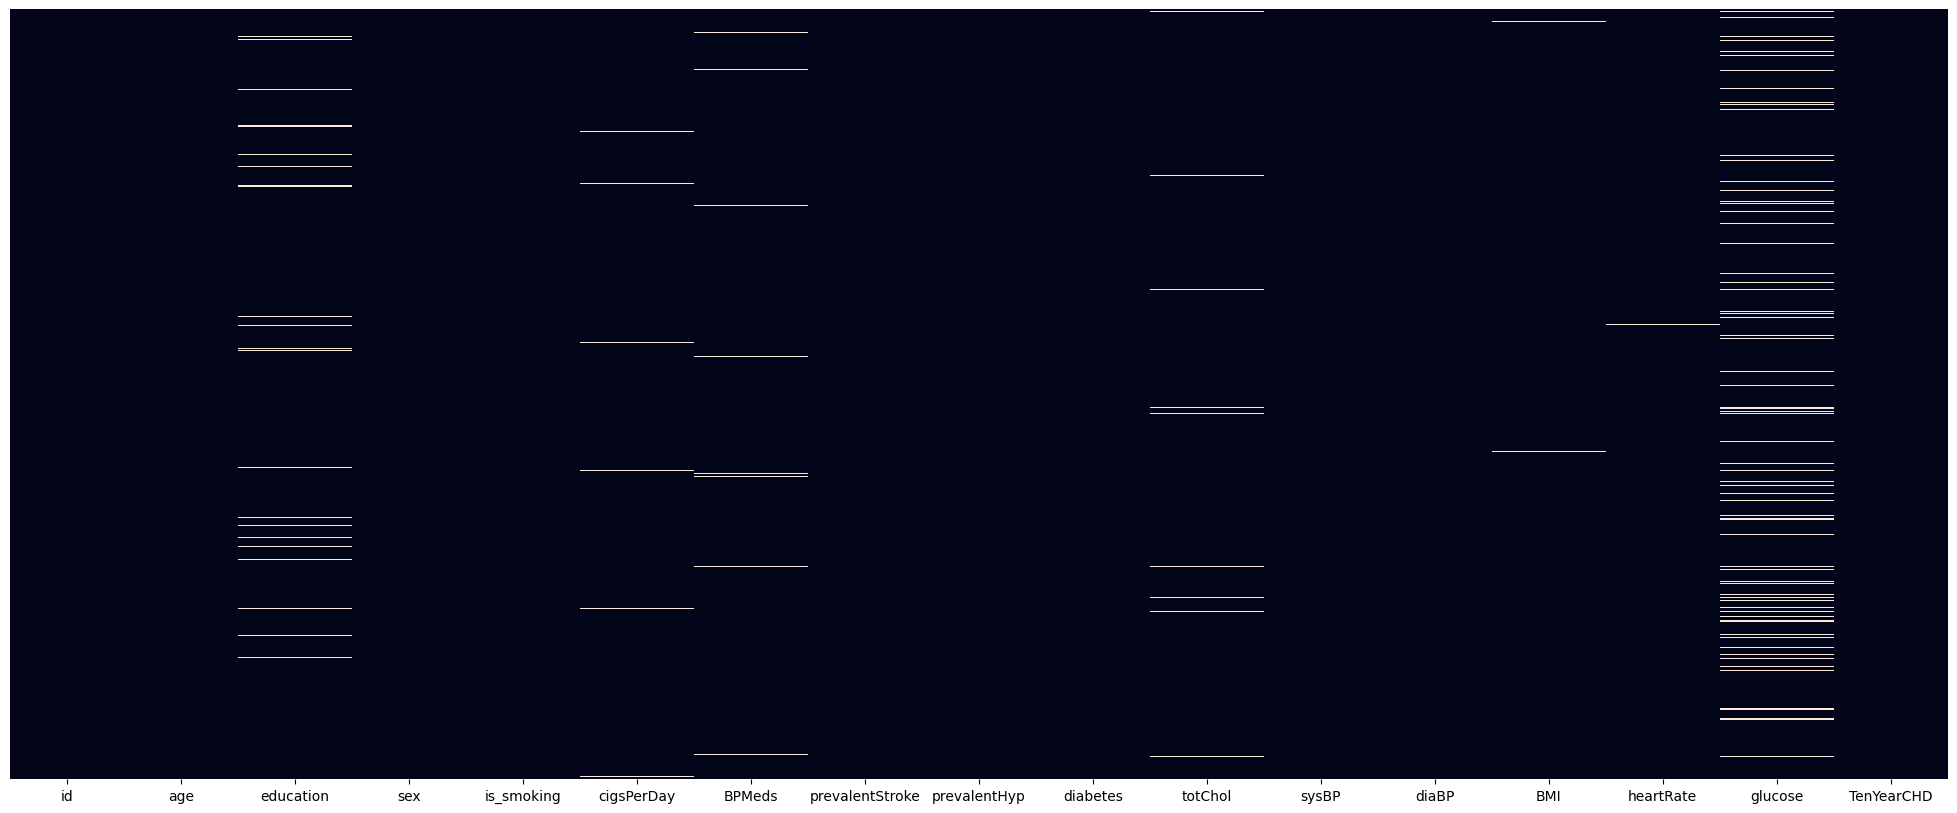

In [12]:
# Visualizing the missing values
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(),cbar = False, yticklabels = False)

### What did you know about your dataset?

*From the above heatmap and data analysis i can say that:*
1. There are 3390 rows and 17 coloumns in the dataset.

2. A total of 0 ***duplicate*** values are present in the dataset.

3. A total of 510 ***Null*** values are present in the dataset

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(list(df.columns))

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [14]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

1) **Age**: Age of the patient.

2) **Sex**: male or female("M" or "F")

3) **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO").

4) **CigsPerDay**: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)

5) **BPMeds**: whether or not the patient was on blood pressure medication.

6) **Prevalent Stroke**: whether or not the patient had previously had a stroke.

7) **Prevalent Hyp**: whether or not the patient was hypertensive.

8) **Diabetes**: whether or not the patient had diabetes.

9) **Tot Chol**: total cholesterol level.

10) **Sys BP**: systolic blood pressure.

11) **Dia BP**: diastolic blood pressure.

12) **BMI**: Body Mass Index.

13) **Heart Rate**: heart rate.

14) **Glucose**: glucose level.

15) **TenYearCHD**: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

To handel the null values with statistical values we are going to check the distribution and otliers in the data

In [16]:
# Write your code to make your dataset analysis ready.
# storing the co,umns that contains null values seprately
null_col = ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

<Axes: >

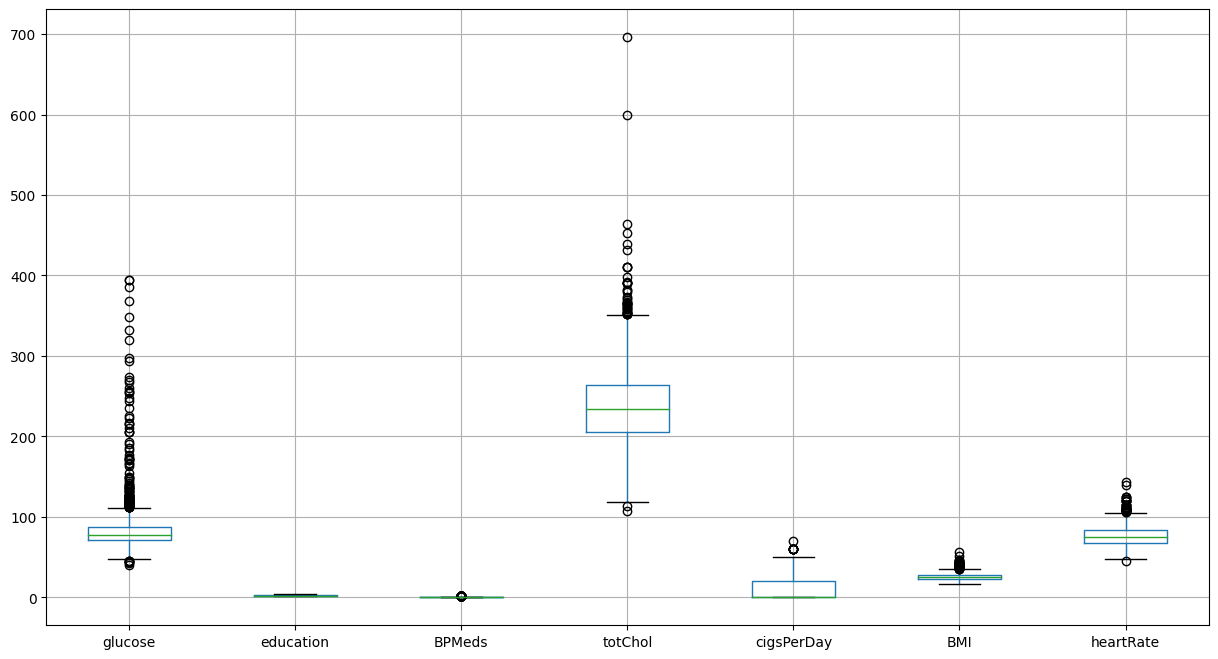

In [17]:
#Vosualising the columns having null values
plt.figure(figsize=(15,8))
df[null_col].boxplot()

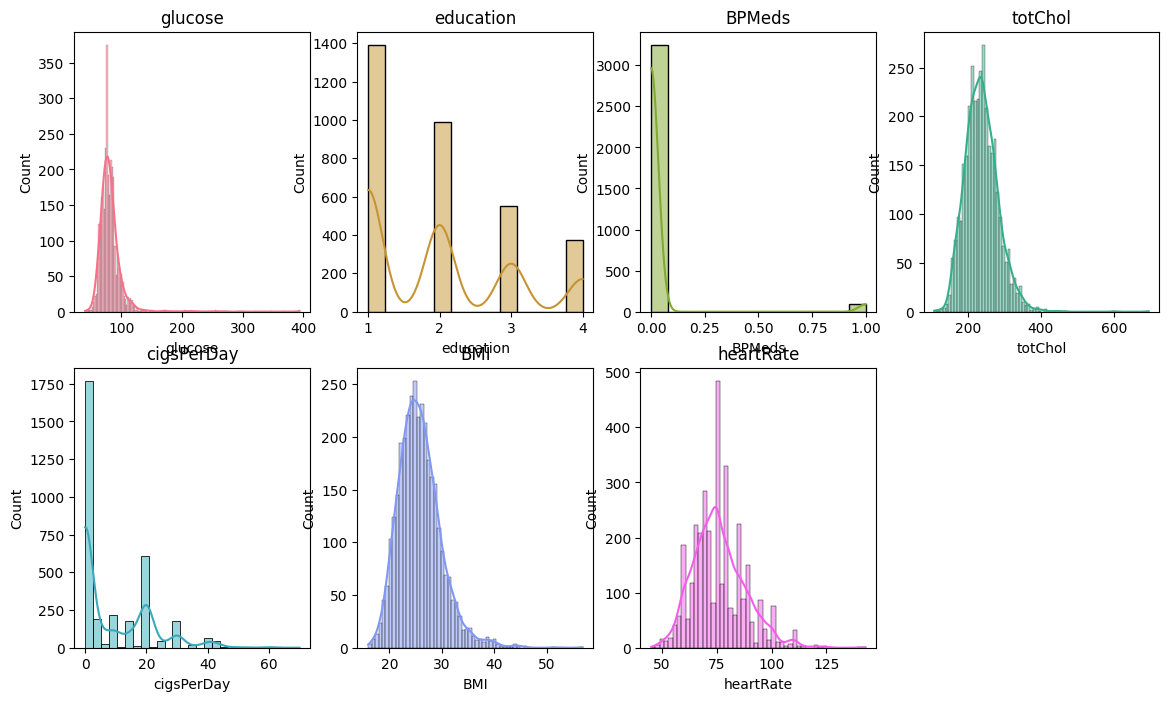

In [18]:
# Create distribution plots
# Define a list of colors
colors = sns.color_palette("husl", len(null_col))

# Create a figure with 8 subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over the null column list and plot each column's distribution
for i, column in enumerate(null_col):
    # Select the current axis
    ax = axes[i]
    # Plot a distplot of the current column with a different color
    sns.histplot(df[column], ax=ax, color=colors[i],kde='true')

    # Add a title to the plot
    ax.set_title(column)

# Remove any unused subplots
for j in range(len(null_col), len(axes)):
    axes[j].remove()

# Display the plots
plt.show()

In [19]:
# Imputing missing values with median or mode
df.fillna({'glucose': df['glucose'].median(),
           'education': df['education'].mode()[0],
           'BPMeds': df['BPMeds'].mode()[0],
           'totChol': df['totChol'].median(),
           'cigsPerDay': df['cigsPerDay'].median(),
           'BMI': df['BMI'].median(),
           'heartRate': df['heartRate'].median()}, inplace=True)

### What all manipulations have you done and insights you found?

Taking into consideration the presence of outliers and the data distribution characteristics, we've selected the following measures of central tendency for imputing null values in the specified columns:

* For "education" and "BPMeds," which are categorical variables, the mode is the most suitable choice. The mode represents the most frequently occurring category in the dataset and offers valuable insights into the predominant levels of education and the most common presence or absence of blood pressure medication.

* Regarding "glucose," "totChol," "cigsPerDay," "BMI," and "heartRate," which are continuous numerical variables and might exhibit extreme values or outliers, we've opted for the median as the preferred measure of central tendency. The median is less influenced by extreme values compared to the mean and serves as a robust indicator of the central tendency within the distribution.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [20]:
# Creating empty lists to store categorical and continuous variables
categorical_variables = []
continuous_variables = []

# Iterateing through the columns in the DataFrame
for column in df.columns:
    # Exclude the 'id' column
    if column == 'id':
        continue

    # Checking if the number of unique values is less than 10, indicating a categorical variable
    if df[column].nunique() < 10:
        # Appending the column name to the categorical variables list
        categorical_variables.append(column)
    else:
        # If there are 10 or more unique values, consider it a continuous variable
        continuous_variables.append(column)

# Printing the lists of categorical and continuous variables
print("Categorical Variables:", categorical_variables)
print("Continuous Variables:", continuous_variables)

Categorical Variables: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Continuous Variables: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


#### Chart - 1

**Distribution Of Categorical Features**

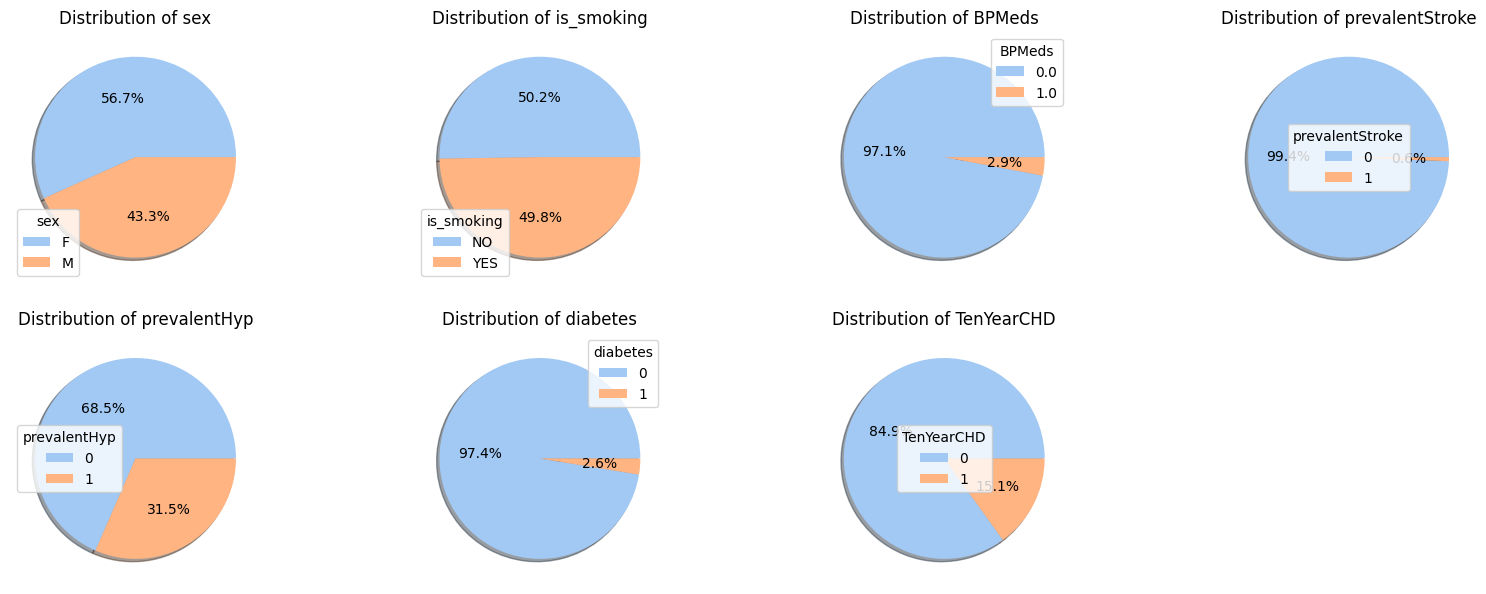

In [21]:
# Create a figure with a specified size
plt.figure(figsize=(20, 15))

# Loop through the categorical variables in your DataFrame
for i, j in enumerate(categorical_variables[1:]):
    # Create subplots in a 4x4 grid
    plt.subplot(4, 4, i + 1)

    # Calculate value counts for the current categorical variable
    value_counts = df[j].value_counts()

    # Define labels for the pie chart based on unique values
    labels = value_counts.index.astype(str)

    # Define colors for the pie chart
    colors = sns.color_palette('pastel', len(labels))

    # Create a pie chart using value counts of the categorical variable
    plt.pie(value_counts, colors=colors, autopct='%1.1f%%', shadow=True)

    # Set the legend with labels
    plt.legend(labels, title=j)

    # Set the title of the subplot
    plt.title(f'Distribution of {j}')

# Show the entire figure with all subplots
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are particularly valuable when you need to visually assess the distribution of distinct categories or discrete variables. In our case, we utilized pie charts to effectively illustrate how various categorical features are distributed.

##### 2. What is/are the insight(s) found from the chart?


- Approximately 56.7% of the individuals in the dataset are female, while the remaining percentage represents males.

- About 50.24% of the individuals in the dataset are smokers.

- A relatively small percentage, specifically 2.9% of the people, are taking medications for managing high blood pressure (BP Medicines).

- A significant portion of the dataset, 68.5%, has a history of strokes, while 31.5% have a history of hypertension.

- Approximately 2.6% of the individuals in the dataset are diagnosed with diabetes.

- Approximately 15.1% of the individuals in the dataset are at risk of developing heart diseases within the next ten years.

#### Chart - 2

**Univariate analysis of all variables**

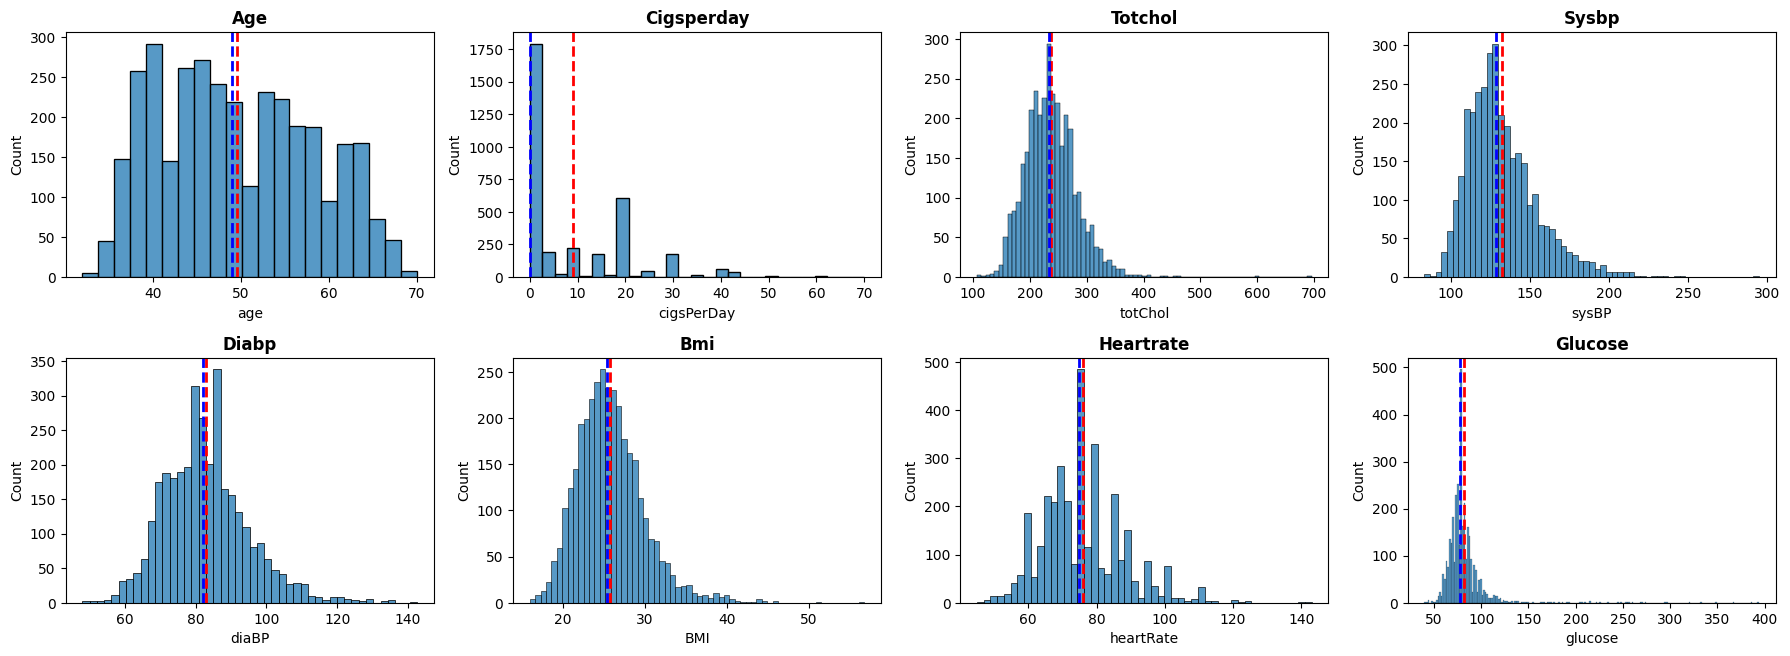

In [22]:
# Chart - 2 visualization code
# Creating a figure with a specified size
plt.figure(figsize=(18, 16))

# Iterating through each continuous variable in the list
for n, column in enumerate(continuous_variables):
    # Extracting the feature data
    feature = df[column]

    # Creating subplots in a 5x4 grid
    ax = plt.subplot(5, 4, n + 1)

    # Creating a histogram using seaborn's histplot
    sns.histplot(feature)

    # Adding vertical lines for mean (in red) and median (in blue)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)

    # Setting the title for the subplot
    plt.title(f'{column.title()}', weight='bold')

    # Ensuring tight layout for better spacing between subplots
    plt.tight_layout()

# Displaying the entire figure with all subplots
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are a graphical tool used to visualize the distribution of numerical data by grouping it into discrete bins. They are a precise and effective method for illustrating how data is distributed numerically. In a histogram, the X-axis represents the ranges or intervals (bins), and the Y-axis indicates the frequency or count of data points within each bin. Essentially, it's a specific type of bar plot tailored to showcase the distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?


- The dataset predominantly consists of individuals aged between 40 and 60 years, with relatively fewer individuals below 30 or above 70 years old.

- Examining the histogram, it becomes evident that the majority of individuals in the dataset consume fewer than 10 cigarettes per day. However, there are a few exceptions with higher daily smoking rates, exceeding 20 cigarettes per day.

- The dataset's total cholesterol levels are most concentrated in the range of 200-250 mg/dL, although there are some outliers with levels below 160 mg/dL or above 300 mg/dL.

- Systolic blood pressure levels in the dataset are predominantly clustered between 120-140 mmHg. Nonetheless, there are instances of both lower (below 90 mmHg) and higher (above 160 mmHg) systolic blood pressure values.

- Diastolic blood pressure levels exhibit a peak between 80-90 mmHg, but there are instances of lower (below 60 mmHg) and higher (above 100 mmHg) values in the dataset.

- The majority of individuals in the dataset have a body mass index (BMI) in the range of 24-26, although some individuals have BMIs falling below 18 or exceeding 35.

- Heart rates in the dataset are most commonly between 60-90 beats per minute. However, there are individuals with heart rates below 50 beats per minute or above 100 beats per minute.

- Blood glucose levels in the dataset primarily fall between 70-90 mg/dL. Nevertheless, there are cases with lower (below 60 mg/dL) or higher (above 130 mg/dL) blood glucose readings.

#### Chart - 3

**Distribution Of Education Levels**

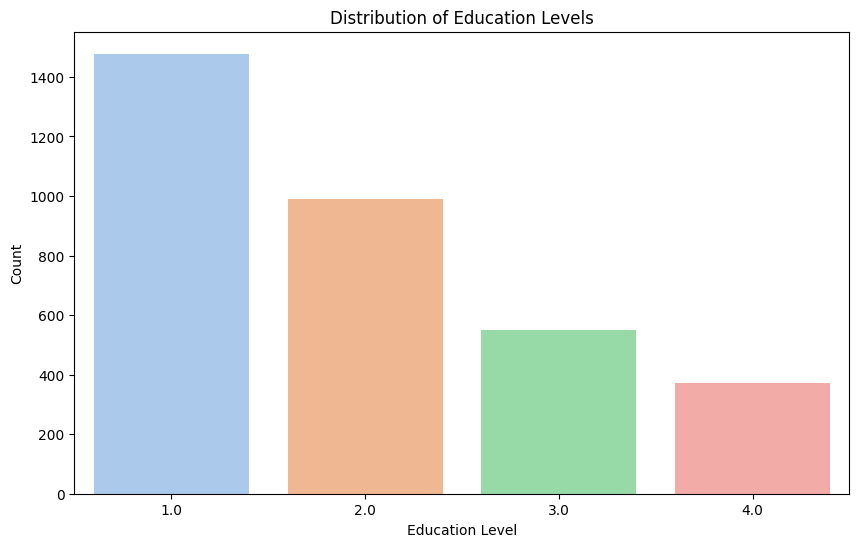

In [23]:
# Chart - 3 visualization code
# Create a count plot for education levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="education", palette='pastel')

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?


A count plot provides a quick and straightforward way to visualize the frequency or count of each category within a categorical variable, allowing for easy identification of the most common and less common categories in the dataset.

##### 2. What is/are the insight(s) found from the chart?

In this dataset most of the population have Education Level - 1 with 42.1% and least education level 4 with 11.3% .

#### Chart - 4

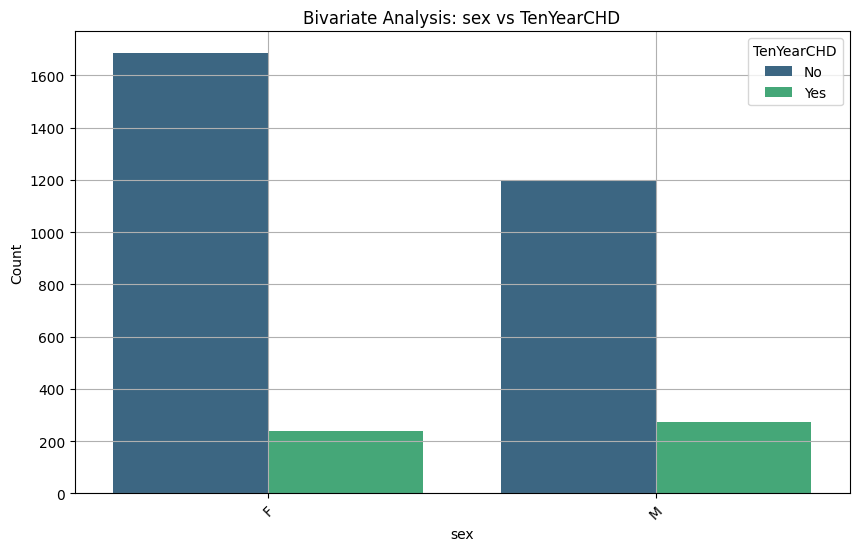

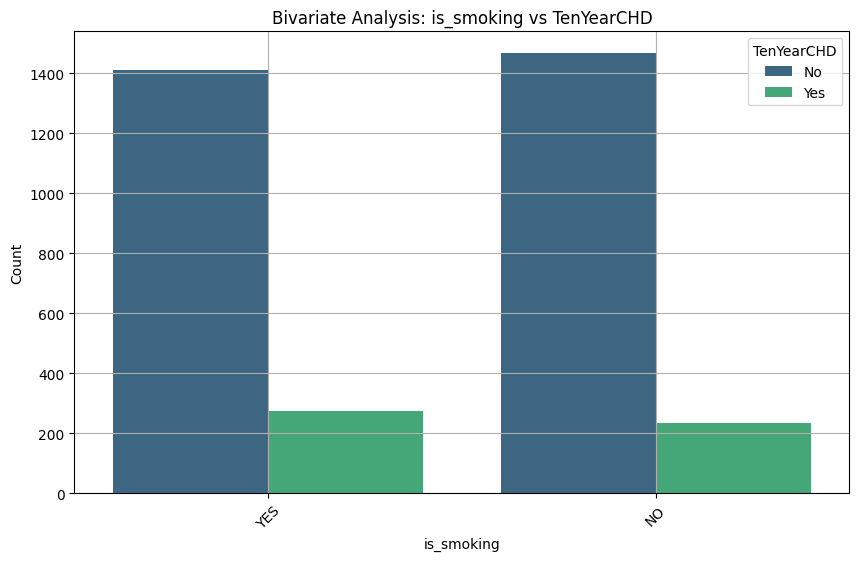

In [24]:
# Chart - 4 visualization code
categorical_columns = df.select_dtypes(include=['object']).columns

# Bivariate analysis
for col in categorical_columns:
    if col != 'TenYearCHD':
        # Create a plot
        plt.figure(figsize=(10, 6))

        # Count plot
        sns.countplot(data=df, x=col, hue='TenYearCHD', palette='viridis')

        # Set plot labels and title
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Bivariate Analysis: {col} vs TenYearCHD')

        # Show the plot
        plt.legend(title='TenYearCHD', loc='upper right', labels=['No', 'Yes'])
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()

##### 1. Why did you pick the specific chart?

Countplot helps in visualizing the distribution and frequency of categorical variables in your data, making it easier to see how different categories relate to each other and potentially to a target variable.

##### 2. What is/are the insight(s) found from the chart?

* Males are more prone top heart diseases in comparison to females.
* People who smoke have a higher chnace of having heart diseases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company can launch targeted campaigns aimed at raising awareness about the elevated risk of Coronary Heart Disease (CHD) among both male individuals and smokers.

#### Chart - 5

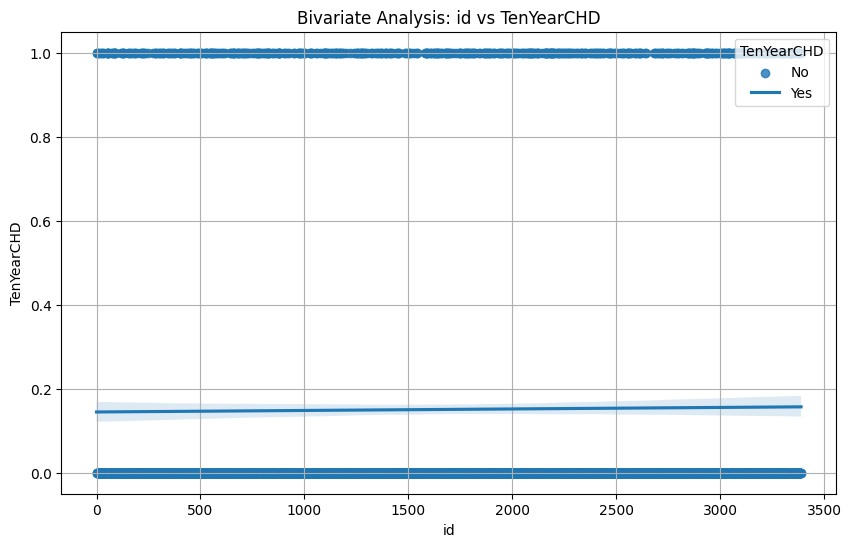

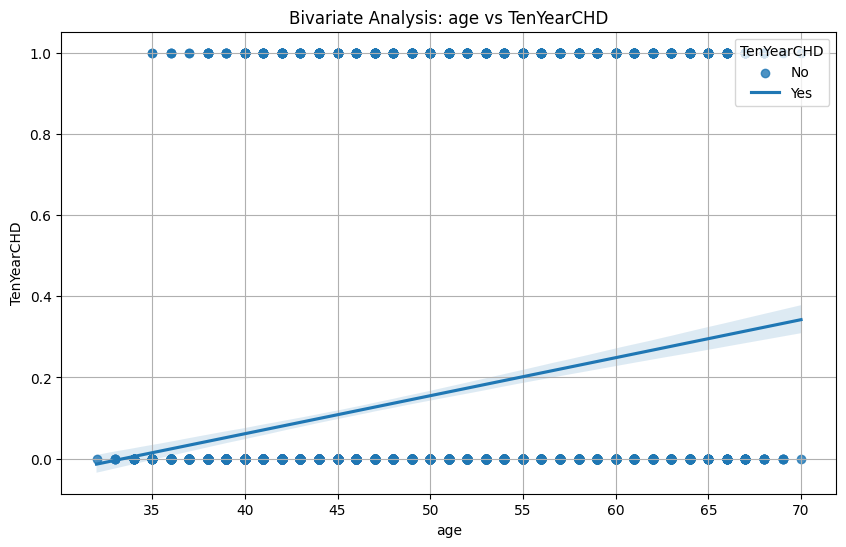

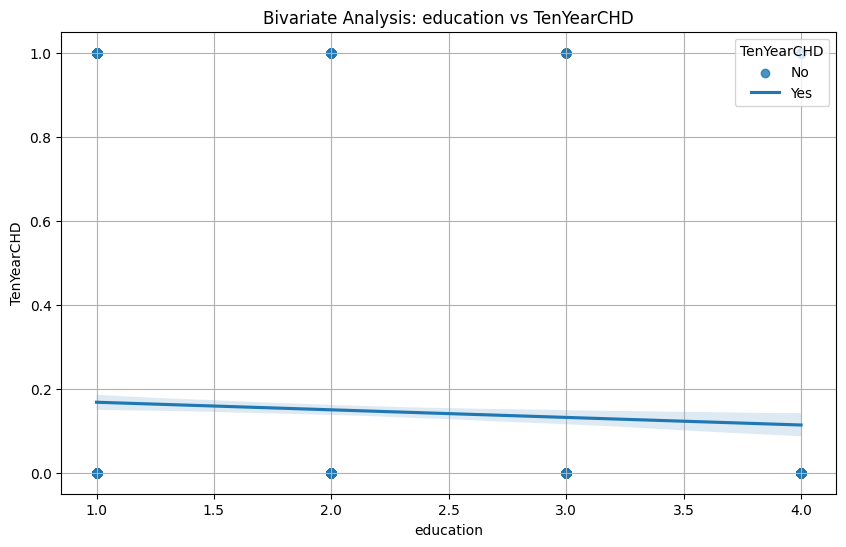

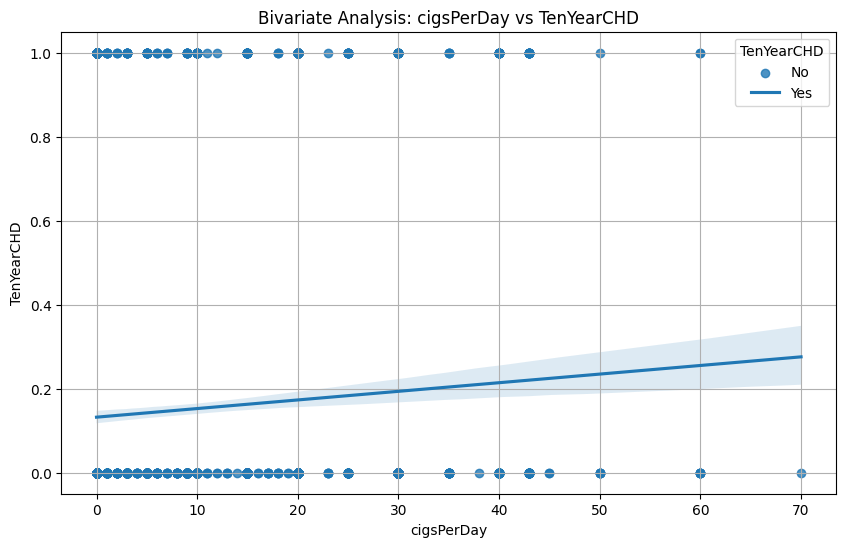

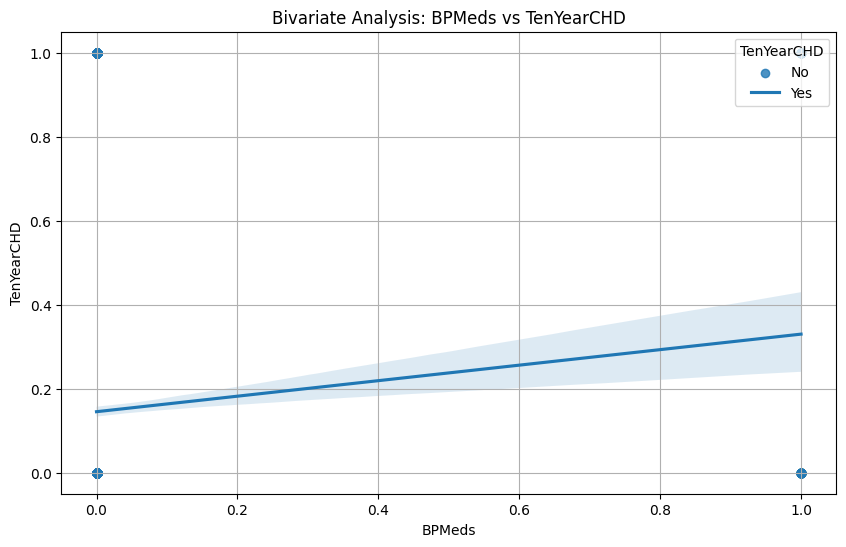

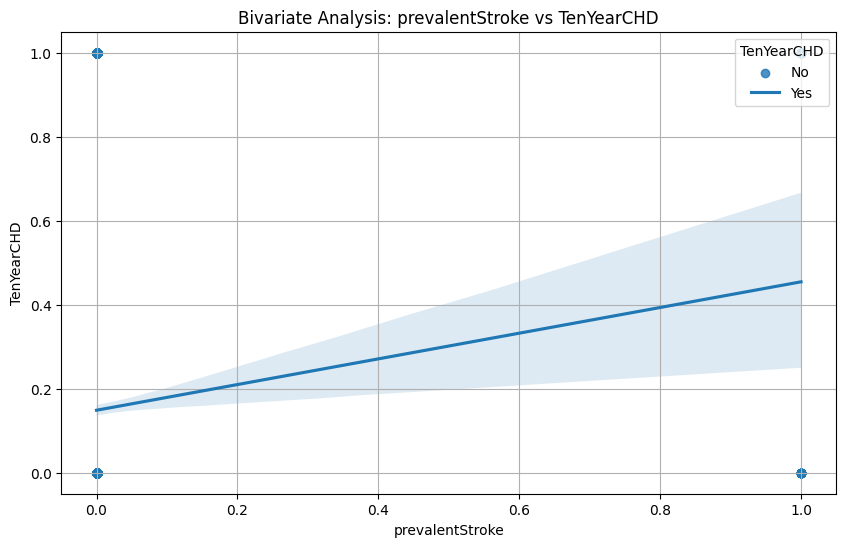

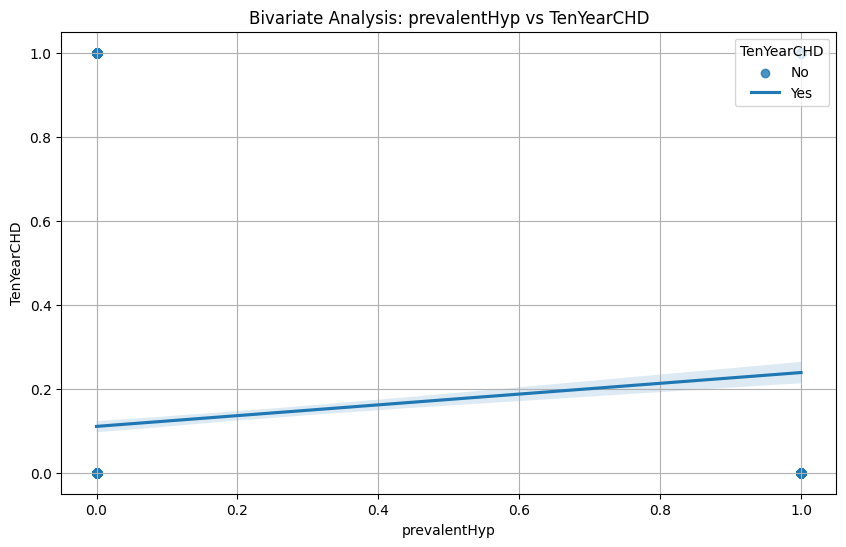

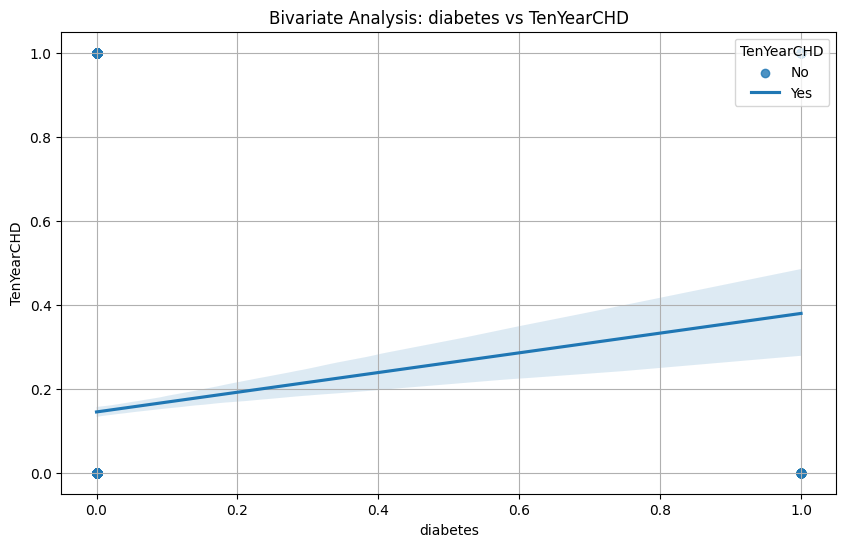

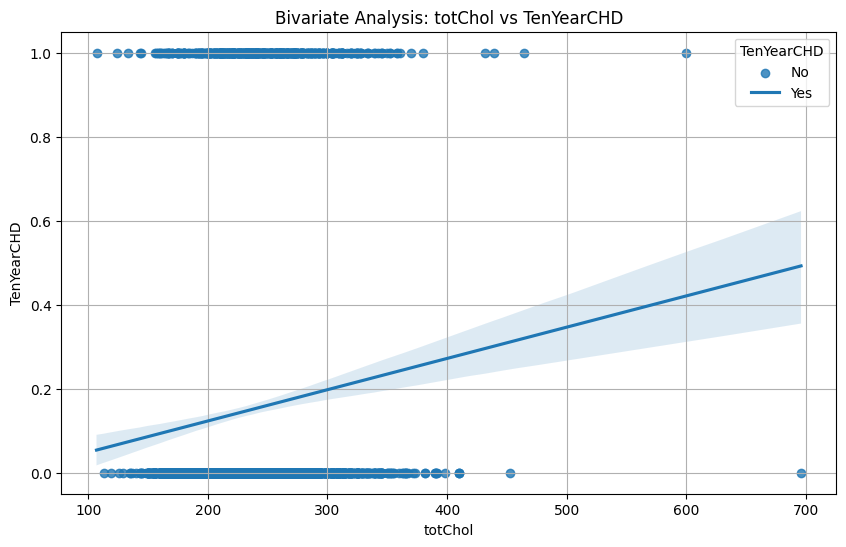

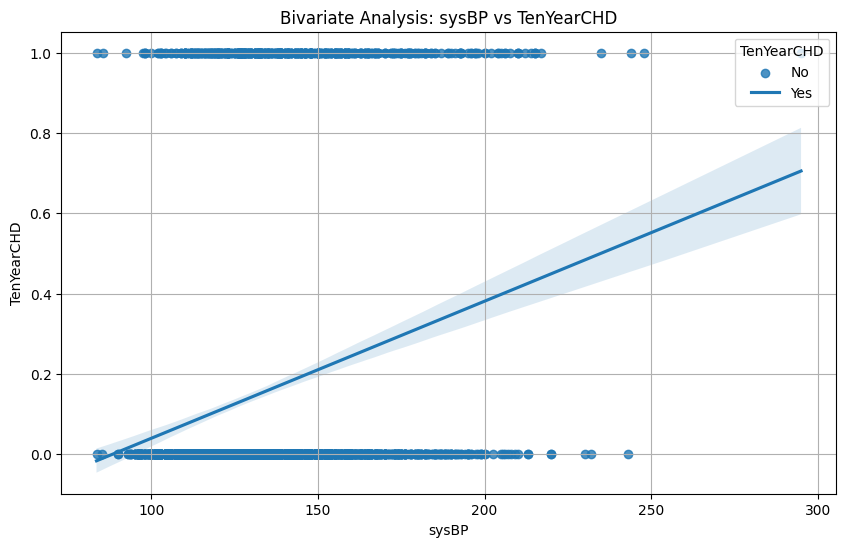

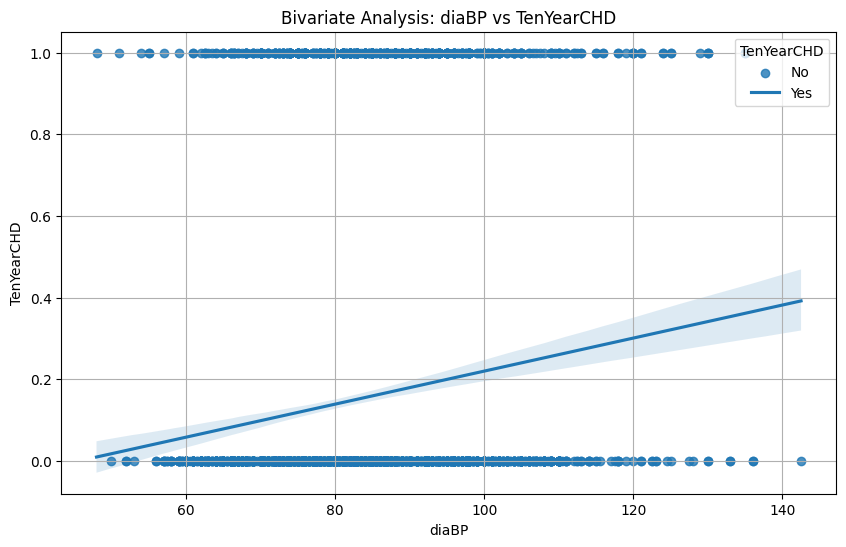

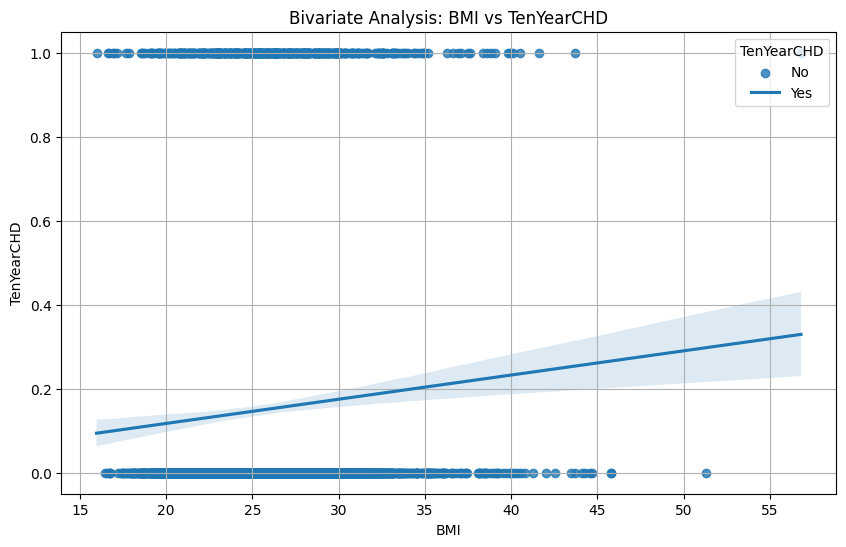

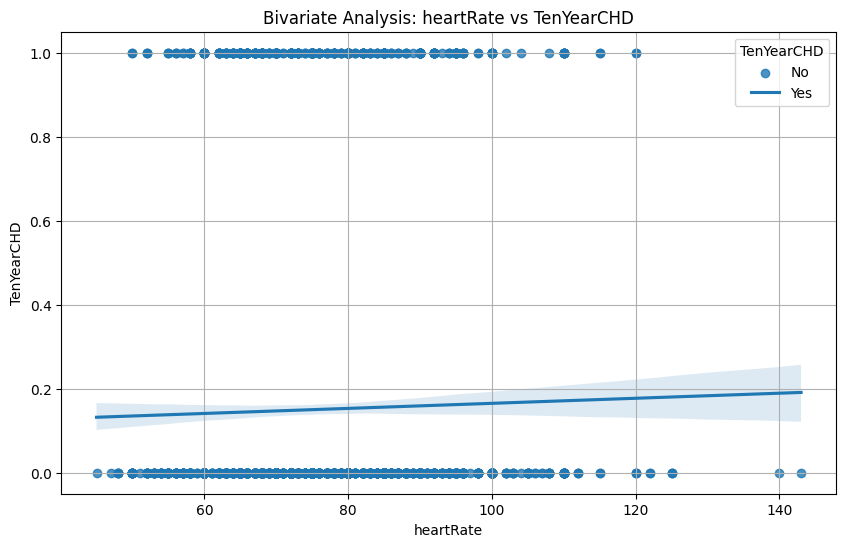

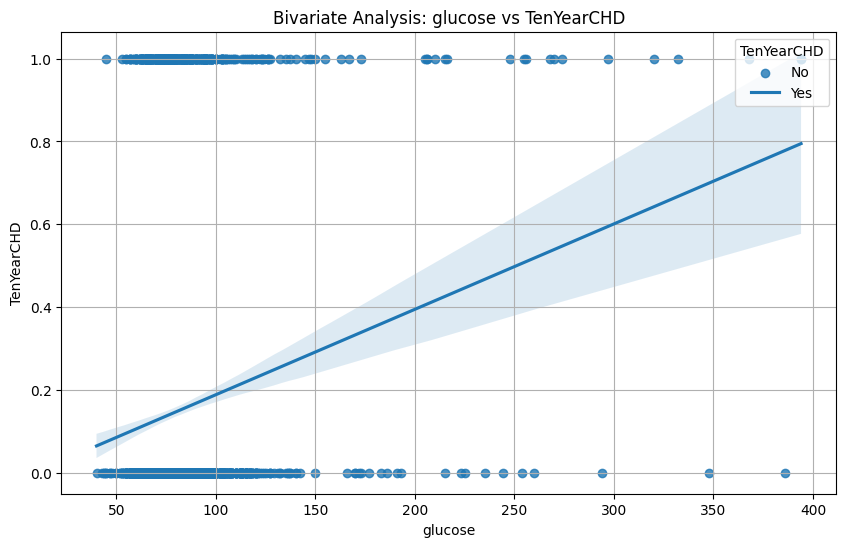

In [25]:
# Chart - 5 visualization code
# Numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Bivariate analysis
for col in numeric_columns:
    if col != 'TenYearCHD':
        # Create a plot
        plt.figure(figsize=(10, 6))

        # Scatter plot
        sns.regplot(data=df, x=col, y='TenYearCHD')

        # Set plot labels and title
        plt.xlabel(col)
        plt.ylabel('TenYearCHD')
        plt.title(f'Bivariate Analysis: {col} vs TenYearCHD')

        # Show the plot
        plt.legend(title='TenYearCHD', loc='upper right', labels=['No', 'Yes'])
        plt.grid(True)
        plt.show()


##### 1. Why did you pick the specific chart?

Above, we used regression plots to visualize the correlations between various features and TenYearCHD. Regression plots are commonly employed for purposes such as prediction, forecasting, time series modeling, and discerning causal relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Several features exhibit a positive correlation with TenYearCHD. These features include Age, Sex, CigsPerDay, BPMeds, prevalentStroke, prevalentHYP, Diabetes, TotChol, sysBP, diaBP, BMI, and Glucose.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This positive relationship suggests that as these factors increase or change, the likelihood of experiencing a TenYearCHD event also tends to increase. Understanding these correlations can be crucial for risk assessment and prevention strategies in the context of Coronary Heart Disease.

#### Chart - 6

**Is a person who has had a stroke more susceptible to coronary heart disease?**

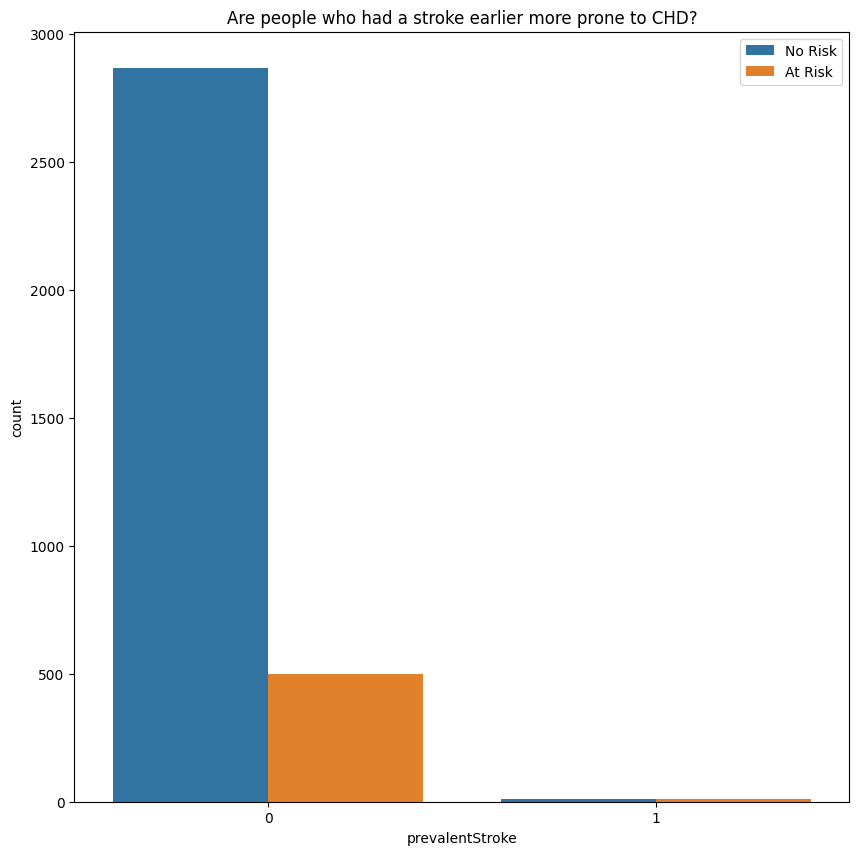

In [26]:
# Chart - 6 visualization code

plt.figure(figsize=(10, 10))

# Creating a countplot to visualize the relationship between 'prevalentStroke' and 'TenYearCHD'
sns.countplot(x=df['prevalentStroke'], hue=df['TenYearCHD'])

# Setting a title for the plot
plt.title('Are people who had a stroke earlier more prone to CHD?')

# Adding a legend to label the 'No Risk' and 'At Risk' categories
plt.legend(['No Risk', 'At Risk'], loc='best')

# displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart is a countplot that compares the CHD risk level of patients who have had a prevalent stroke versus those who have not. It was likely chosen to investigate whether there is an association between having a stroke and being more susceptible to CHD.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that individuals who have experienced a prevalent stroke seem to face an elevated risk of Coronary Heart Disease (CHD) compared to those who haven't had a stroke. More precisely, there is a higher proportion of patients at risk for CHD among those with a history of stroke as opposed to those without. These observations imply that experiencing a stroke may potentially be a contributing risk factor for the development of CHD within the context of this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The information gleaned from this chart holds valuable implications for healthcare-oriented businesses, particularly those specializing in stroke or Coronary Heart Disease (CHD) products and services. For instance, pharmaceutical companies developing medications or therapies for stroke or CHD could contemplate directing their efforts toward patients with a history of stroke, recognizing them as a high-risk group for CHD.

* Healthcare providers might consider implementing CHD risk assessments for individuals who have previously experienced a stroke. This approach could help identify potential CHD risks in such patients, enabling the provision of targeted preventive measures or treatment strategies as needed.

#### Chart - 7

**Does having hypertension increase the risk of developing coronary heart disease?**

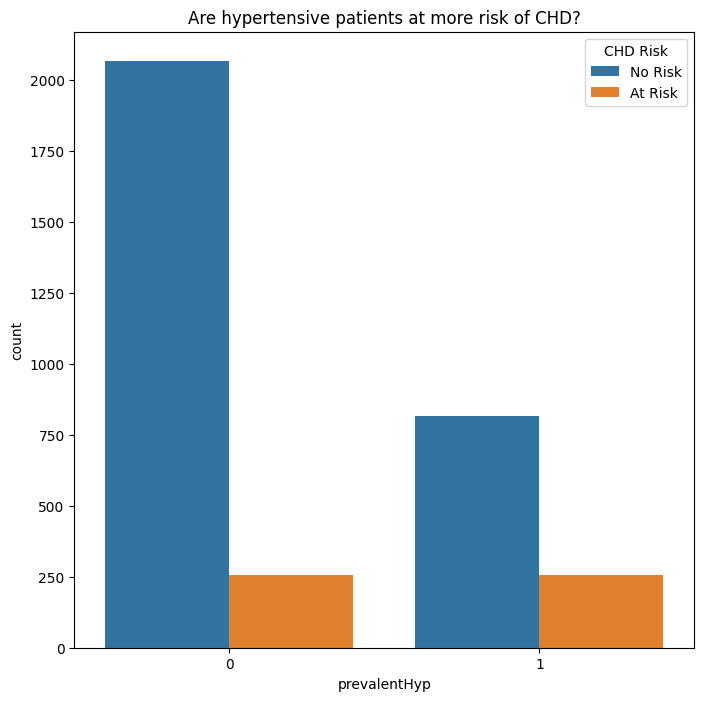

In [27]:
# Chart - 7 visualization code

plt.figure(figsize=(8, 8))

# Creating a countplot to visualize the relationship between 'prevalentHyp' (hypertension) and 'TenYearCHD'
sns.countplot(x=df['prevalentHyp'], hue=df['TenYearCHD'])

# Setting a title for the plot
plt.title('Are hypertensive patients at more risk of CHD?')

# Adding a legend with custom labels to clarify 'No Risk' and 'At Risk' categories
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

This specific chart was selected to illustrate the association between the prevalence of hypertension and the likelihood of developing coronary heart disease within the dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart illustrates that individuals with prevalent hypertension have a higher likelihood of being at risk for developing coronary heart disease in comparison to those without hypertension.

* In particular, the proportion of patients at risk for CHD appears similar between individuals with prevalent hypertension and those without.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights obtained can assist healthcare enterprises and professionals in identifying individuals with hypertension who are at a higher risk. These individuals may require additional assessment, ongoing monitoring, and comprehensive management to prevent the onset or progression of coronary heart disease.

#### Chart - 8

**Do individuals with diabetes have a higher risk of developing coronary heart disease?**

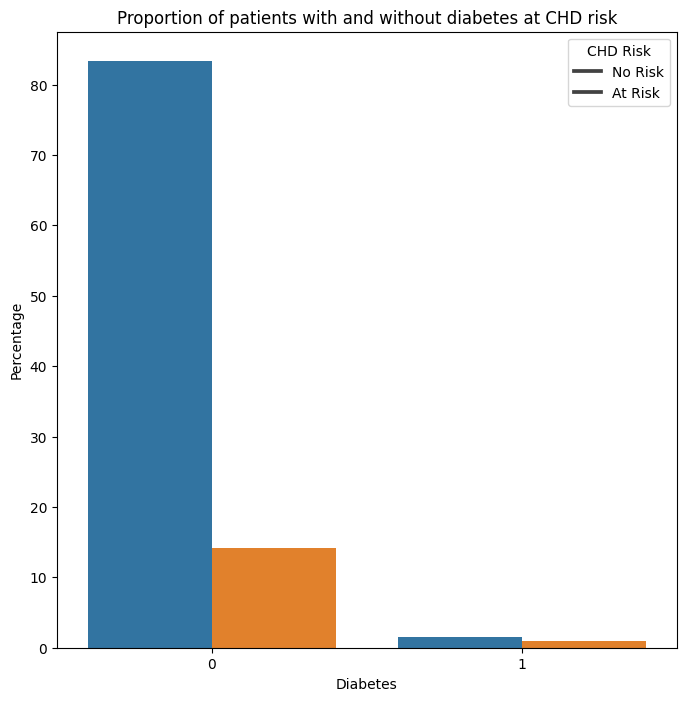

In [28]:
# Chart - 8 visualization code

plt.figure(figsize=(8, 8))

# Creating a barplot to visualize the proportion of patients with and without diabetes at CHD risk
sns.barplot(x=df['diabetes'], y=df['TenYearCHD'], hue=df['TenYearCHD'], estimator=lambda x: len(x) / len(df) * 100)

# Setting a title for the plot
plt.title('Proportion of patients with and without diabetes at CHD risk')

# Labeling the x-axis and y-axis for clarity
plt.xlabel('Diabetes')
plt.ylabel('Percentage')

# Adding a legend with custom labels to clarify 'No Risk' and 'At Risk' categories
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was picked to visualize the proportion of patients with and without diabetes who are at risk of developing coronary heart disease in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that individuals with diabetes have a higher likelihood of being at risk for developing coronary heart disease in comparison to those without diabetes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can assist healthcare enterprises and professionals in identifying individuals with diabetes who are at a higher risk. These individuals may require additional assessment, ongoing monitoring, and comprehensive management to prevent the onset or progression of coronary heart disease.

#### Chart - 9

**Is there a correlation between total cholesterol levels and coronary heart disease?**

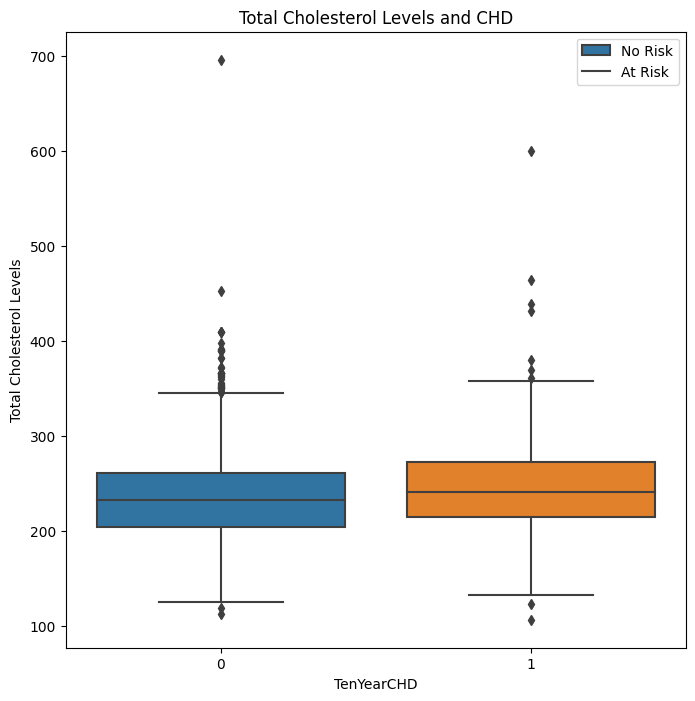

In [29]:
# Chart - 9 visualization code

plt.figure(figsize=(8, 8))

# Creating a boxplot to visualize the distribution of total cholesterol levels ('totChol') with respect to CHD risk ('TenYearCHD')
sns.boxplot(x='TenYearCHD', y='totChol', data=df)

# Setting a title for the plot
plt.title('Total Cholesterol Levels and CHD')

# Labeling the x-axis and y-axis for clarity
plt.xlabel('TenYearCHD')
plt.ylabel('Total Cholesterol Levels')

# Adding a legend to label 'No Risk' and 'At Risk' categories
plt.legend(['No Risk', 'At Risk'])

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

This particular box plot was selected to address the question of whether there exists a relationship between total cholesterol levels and the likelihood of developing coronary heart disease.

##### 2. What is/are the insight(s) found from the chart?

The box plot reveals that, on average, patients who are at risk of developing coronary heart disease tend to have slightly higher total cholesterol levels compared to those who are not at risk. However, it's important to note that there is some overlap in the range of cholesterol levels between the two groups, suggesting that other factors may also play a role in determining the risk of coronary heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The obtained insight can aid healthcare providers in assessing the influence of total cholesterol levels on the probability of coronary heart disease development among their patients. By identifying individuals with elevated cholesterol levels, healthcare providers can initiate suitable interventions to mitigate the risk of disease onset. This proactive approach can contribute to improved patient health outcomes and potential cost savings for healthcare providers over time.

#### Chart - 10

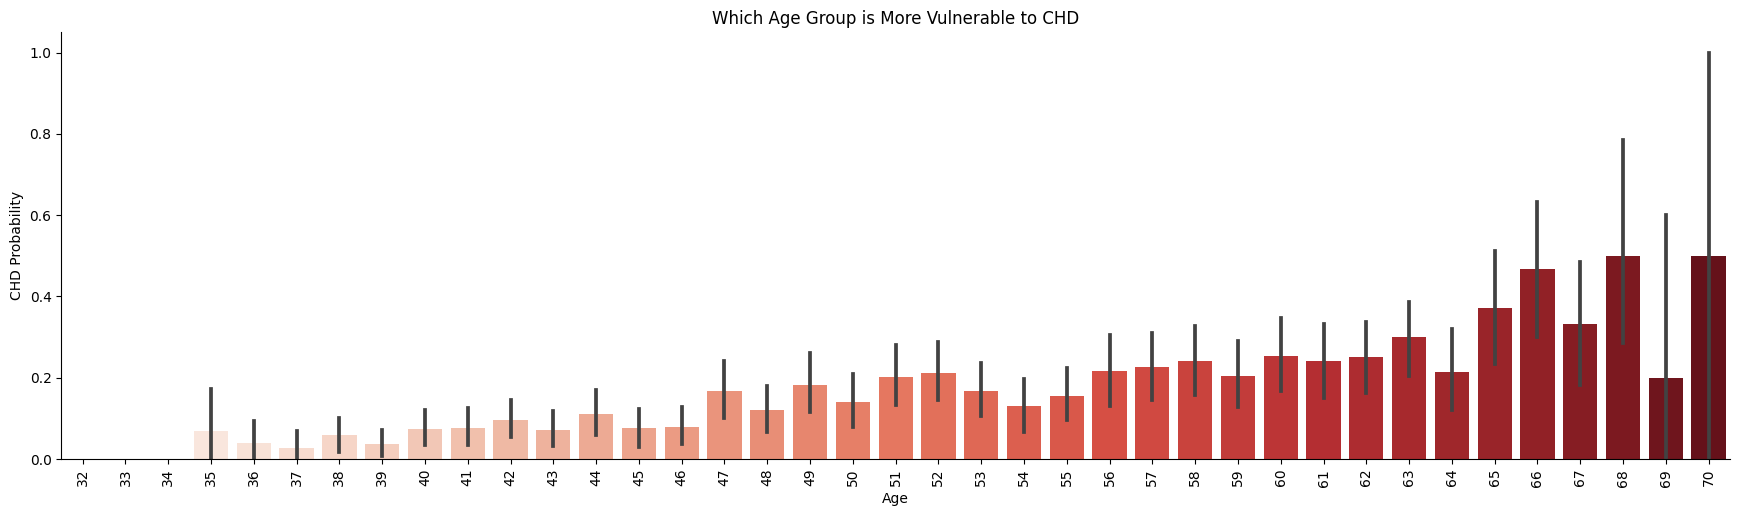

In [30]:
# Chart - 10 visualization code
# Creating a categorical plot using catplot
g = sns.catplot(x='age', y='TenYearCHD', kind='bar', data=df, palette='Reds', aspect=3.5)

# Setting labels for the x-axis and y-axis
g.set_axis_labels('Age', 'CHD Probability')

# Setting a title for the plot
plt.title("Which Age Group is More Vulnerable to CHD")

#Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

The age-CHD Probability plot was constructed to determine which age group exhibits a higher vulnerability to heart diseases.

##### 2. What is/are the insight(s) found from the chart?

Indeed, the analysis of the age-CHD Probability plot suggests a correlation between age and cardiovascular risk. As age increases, there is a noticeable escalation in the likelihood of developing cardiovascular disease. Specifically, individuals aged above 65 years, considered as the elderly population, appear to be at a significantly higher vulnerability to heart diseases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, given the strong correlation between age and cardiovascular risk, it makes sense to target awareness campaigns towards all individuals, irrespective of their current health status or habits, as everyone will inevitably age. Promoting awareness about heart health and preventive measures can benefit the overall well-being of both companies and individuals. This proactive approach can contribute to better cardiovascular health outcomes and reduce the burden of heart diseases on society.

#### Chart - 11

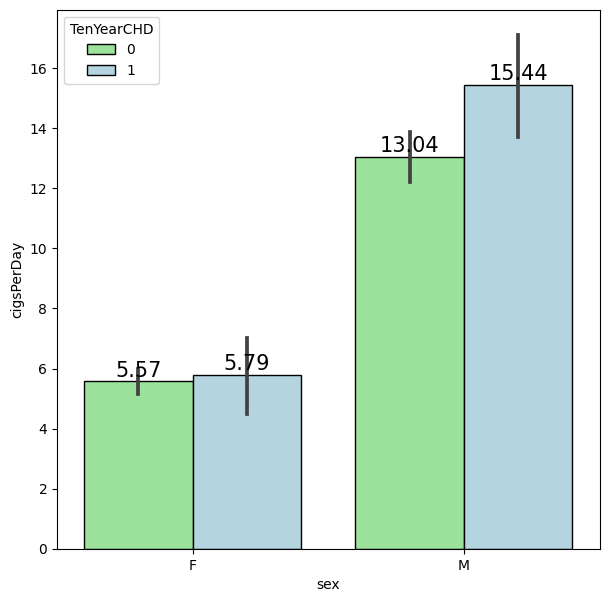

In [31]:
# Chart - 11 visualization code

plt.figure(figsize=(7, 7))

# Creating a barplot to visualize the relationship between 'sex', 'cigsPerDay', and 'TenYearCHD'
# Colors are assigned to 'sex' categories: 'lightgreen' for females and 'lightblue' for males
plots = sns.barplot(x=df['sex'], y=df['cigsPerDay'], palette=["lightgreen", "lightblue"], hue=df['TenYearCHD'], edgecolor='black')

# Annotate the bars with their exact values
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are a valuable choice when you need to compare distinct segments of data, making them suitable for displaying the distribution of the smoking column in this context.

##### 2. What is/are the insight(s) found from the chart?

There is a higher prevalence of cigarette consumption among males compared to females. Among males, those who consume more cigarettes have an elevated risk of developing Heart Diseases (CHD), whereas among females, there is a relatively similar likelihood of CHD for both smokers and non-smokers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As evident from the data, individuals appear to be at a similar risk of developing heart-related conditions, whether they are smokers or non-smokers. Consequently, when a healthcare company is promoting specific healthcare services such as insurance, routine checkup plans, or tests, they can extend their awareness efforts to include non-smoking communities as well. This approach can help broaden the consumer base, provide protection to a larger segment of the population, and potentially enhance the company's profits.

#### Chart - 12

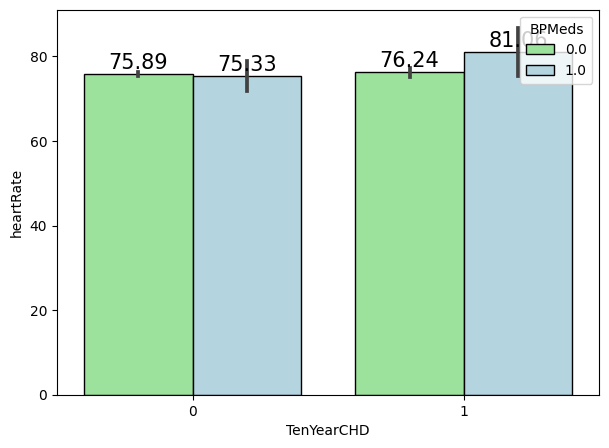

In [32]:
# Chart - 12 visualization code

plt.figure(figsize=(7, 5))
# Creating a barplot to visualize the relationship between 'TenYearCHD', 'heartRate', and 'BPMeds'
# Colors are assigned to 'BPMeds' categories: 'lightgreen' for those not taking medication and 'lightblue' for those taking medication
plots = sns.barplot(x=df['TenYearCHD'], y=df['heartRate'], hue=df['BPMeds'], edgecolor='black', palette=["lightgreen", "lightblue"])

# Annotate the bars with their exact values
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

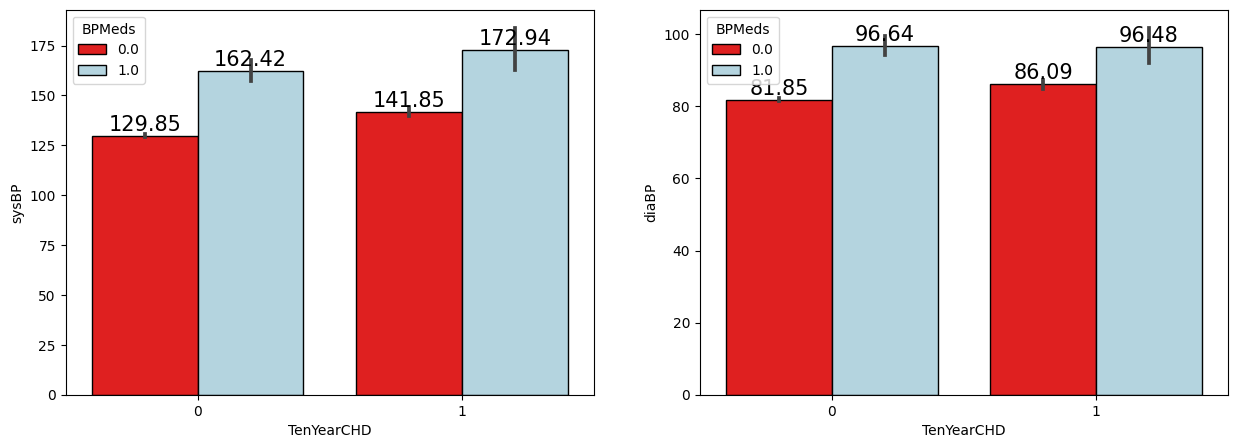

In [33]:
# Chart - 13 visualization code

plt.figure(figsize=(15, 5))

# Creating the first subplot (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)

# Creating a barplot to visualize the relationship between 'TenYearCHD', 'sysBP', and 'BPMeds'
# Colors are assigned to 'BPMeds' categories: 'red' for those not taking medication and 'lightblue' for those taking medication
plots = sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['BPMeds'], edgecolor='black', palette=["red", "lightblue"])

# Annotate the bars with their exact values
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Creating the second subplot (1 row, 2 columns, second plot)
plt.subplot(1, 2, 2)

# Creating a barplot to visualize the relationship between 'TenYearCHD', 'diaBP', and 'BPMeds'
# Colors are assigned to 'BPMeds' categories: 'red' for those not taking medication and 'lightblue' for those taking medication
plots = sns.barplot(x=df['TenYearCHD'], y=df['diaBP'], hue=df['BPMeds'], edgecolor='black', palette=["red", "lightblue"])

# Annotate the bars with their exact values
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Displaying the subplots
plt.show()


##### 1. Why did you pick the specific chart?

The graph presented above utilizes a multiple bar chart to examine the relationship between systolic and diastolic blood pressure (SysBP/diaBP), TenYearCHD, and the use of blood pressure medications (BPmeds). Multiple bar charts are particularly valuable when you need to convey substantial information within limited space. Instead of having just one bar at each division on the horizontal axis, this chart allows for a more comprehensive representation.

##### 2. What is/are the insight(s) found from the chart?

The graph provides valuable insights indicating that individuals who are taking blood pressure medication tend to have elevated systolic (sysBP) and diastolic (diaBP) blood pressure levels. Additionally, these patients also face a heightened risk of developing Coronary Heart Disease (CHD).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare providers and physicians can focus on conducting more comprehensive assessments of patients who are taking blood pressure medication. This proactive approach can lead to reduced diagnostic costs and an increase in the company's revenue.

#### Chart - 14 - Correlation Heatmap

<ipython-input-34-e79c2923e6ff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

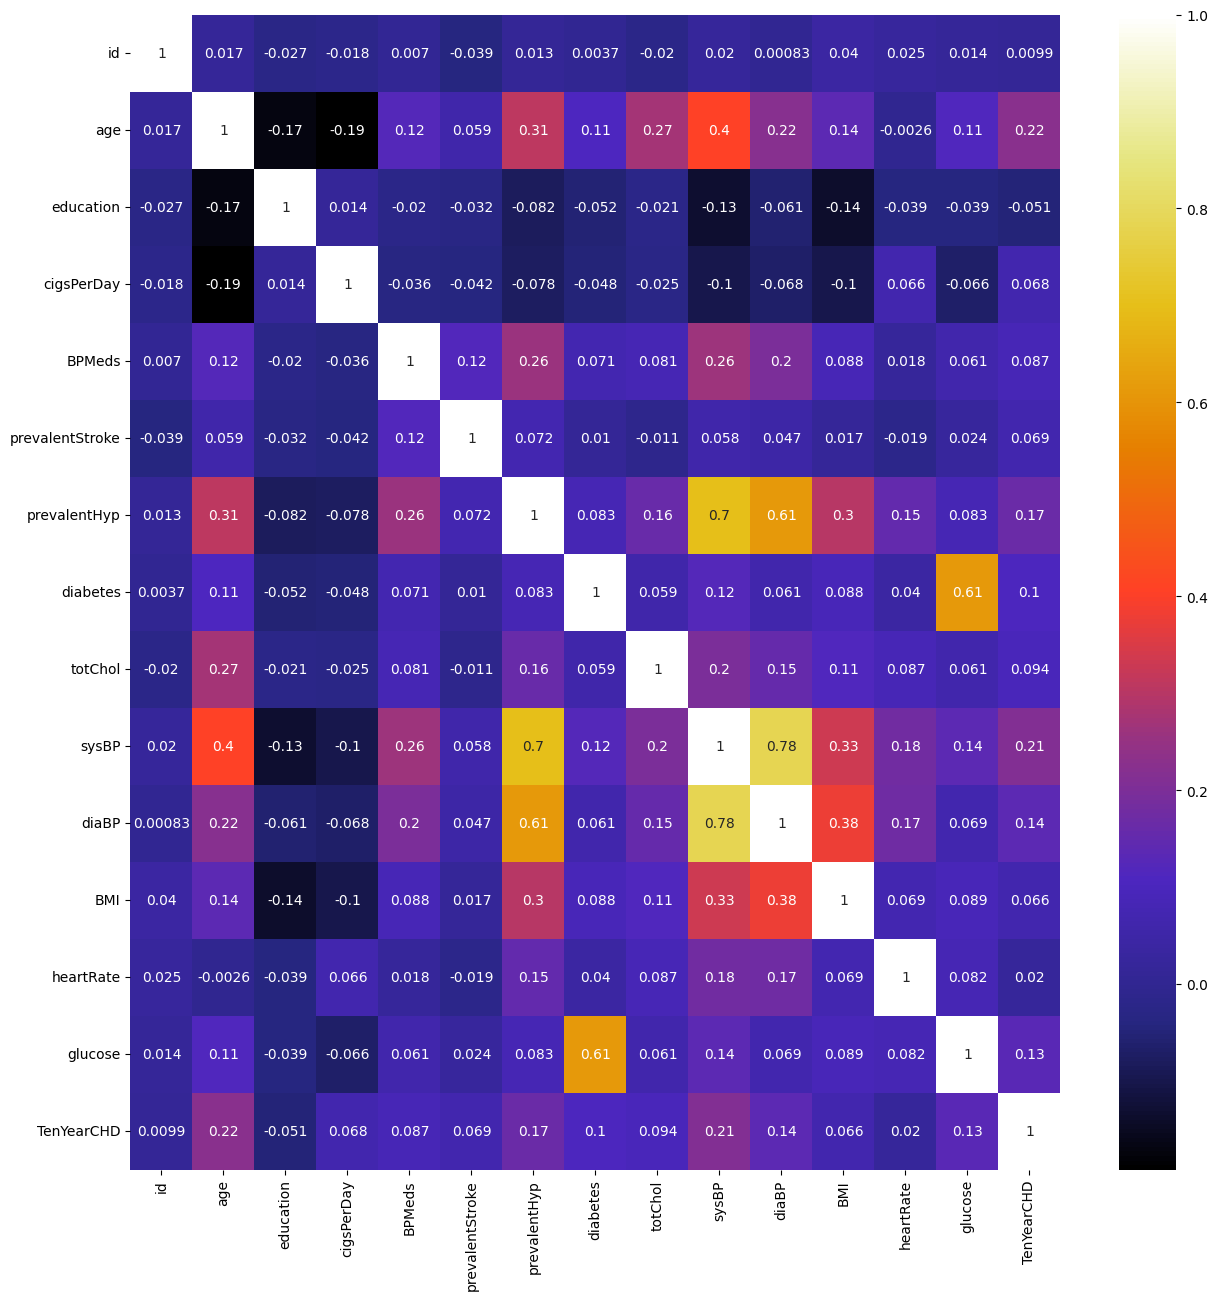

In [34]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=plt.cm.CMRmap)

##### 1. Why did you pick the specific chart?

Correlation Heatmap serves as an efficient means to visually represent the relationships between all possible pairs of features within a dataset. This heatmap employs colors to depict the strength of the correlation coefficients, facilitating the swift identification of strongly correlated features.

##### 2. What is/are the insight(s) found from the chart?

The Correlation Heatmap provides insights into the pairwise correlations among all numerical features in the dataset.

1) The correlation chart reveals a substantial 22% correlation between age and TenYearCHD, suggesting these features may be crucial predictors of CHD risk.

2) Examining the heatmap, it becomes evident that age, systolic blood pressure, and diastolic blood pressure exhibit relatively strong correlations with the target variable TenYearCHD.

3) Furthermore, there exists a moderately strong positive correlation of 78% between systolic and diastolic blood pressure.

4) Additionally, diabetes and glucose demonstrate a notable correlation of 61%.

5) Notably, prevalent hypertension exhibits significant correlations with both systolic and diastolic blood pressure, amounting to 70% and 61%, respectively.

6) It's worth mentioning that age displays a negative correlation of 17% with education and 19% with cigarettes per day.

#### Chart - 15 - Pair Plot

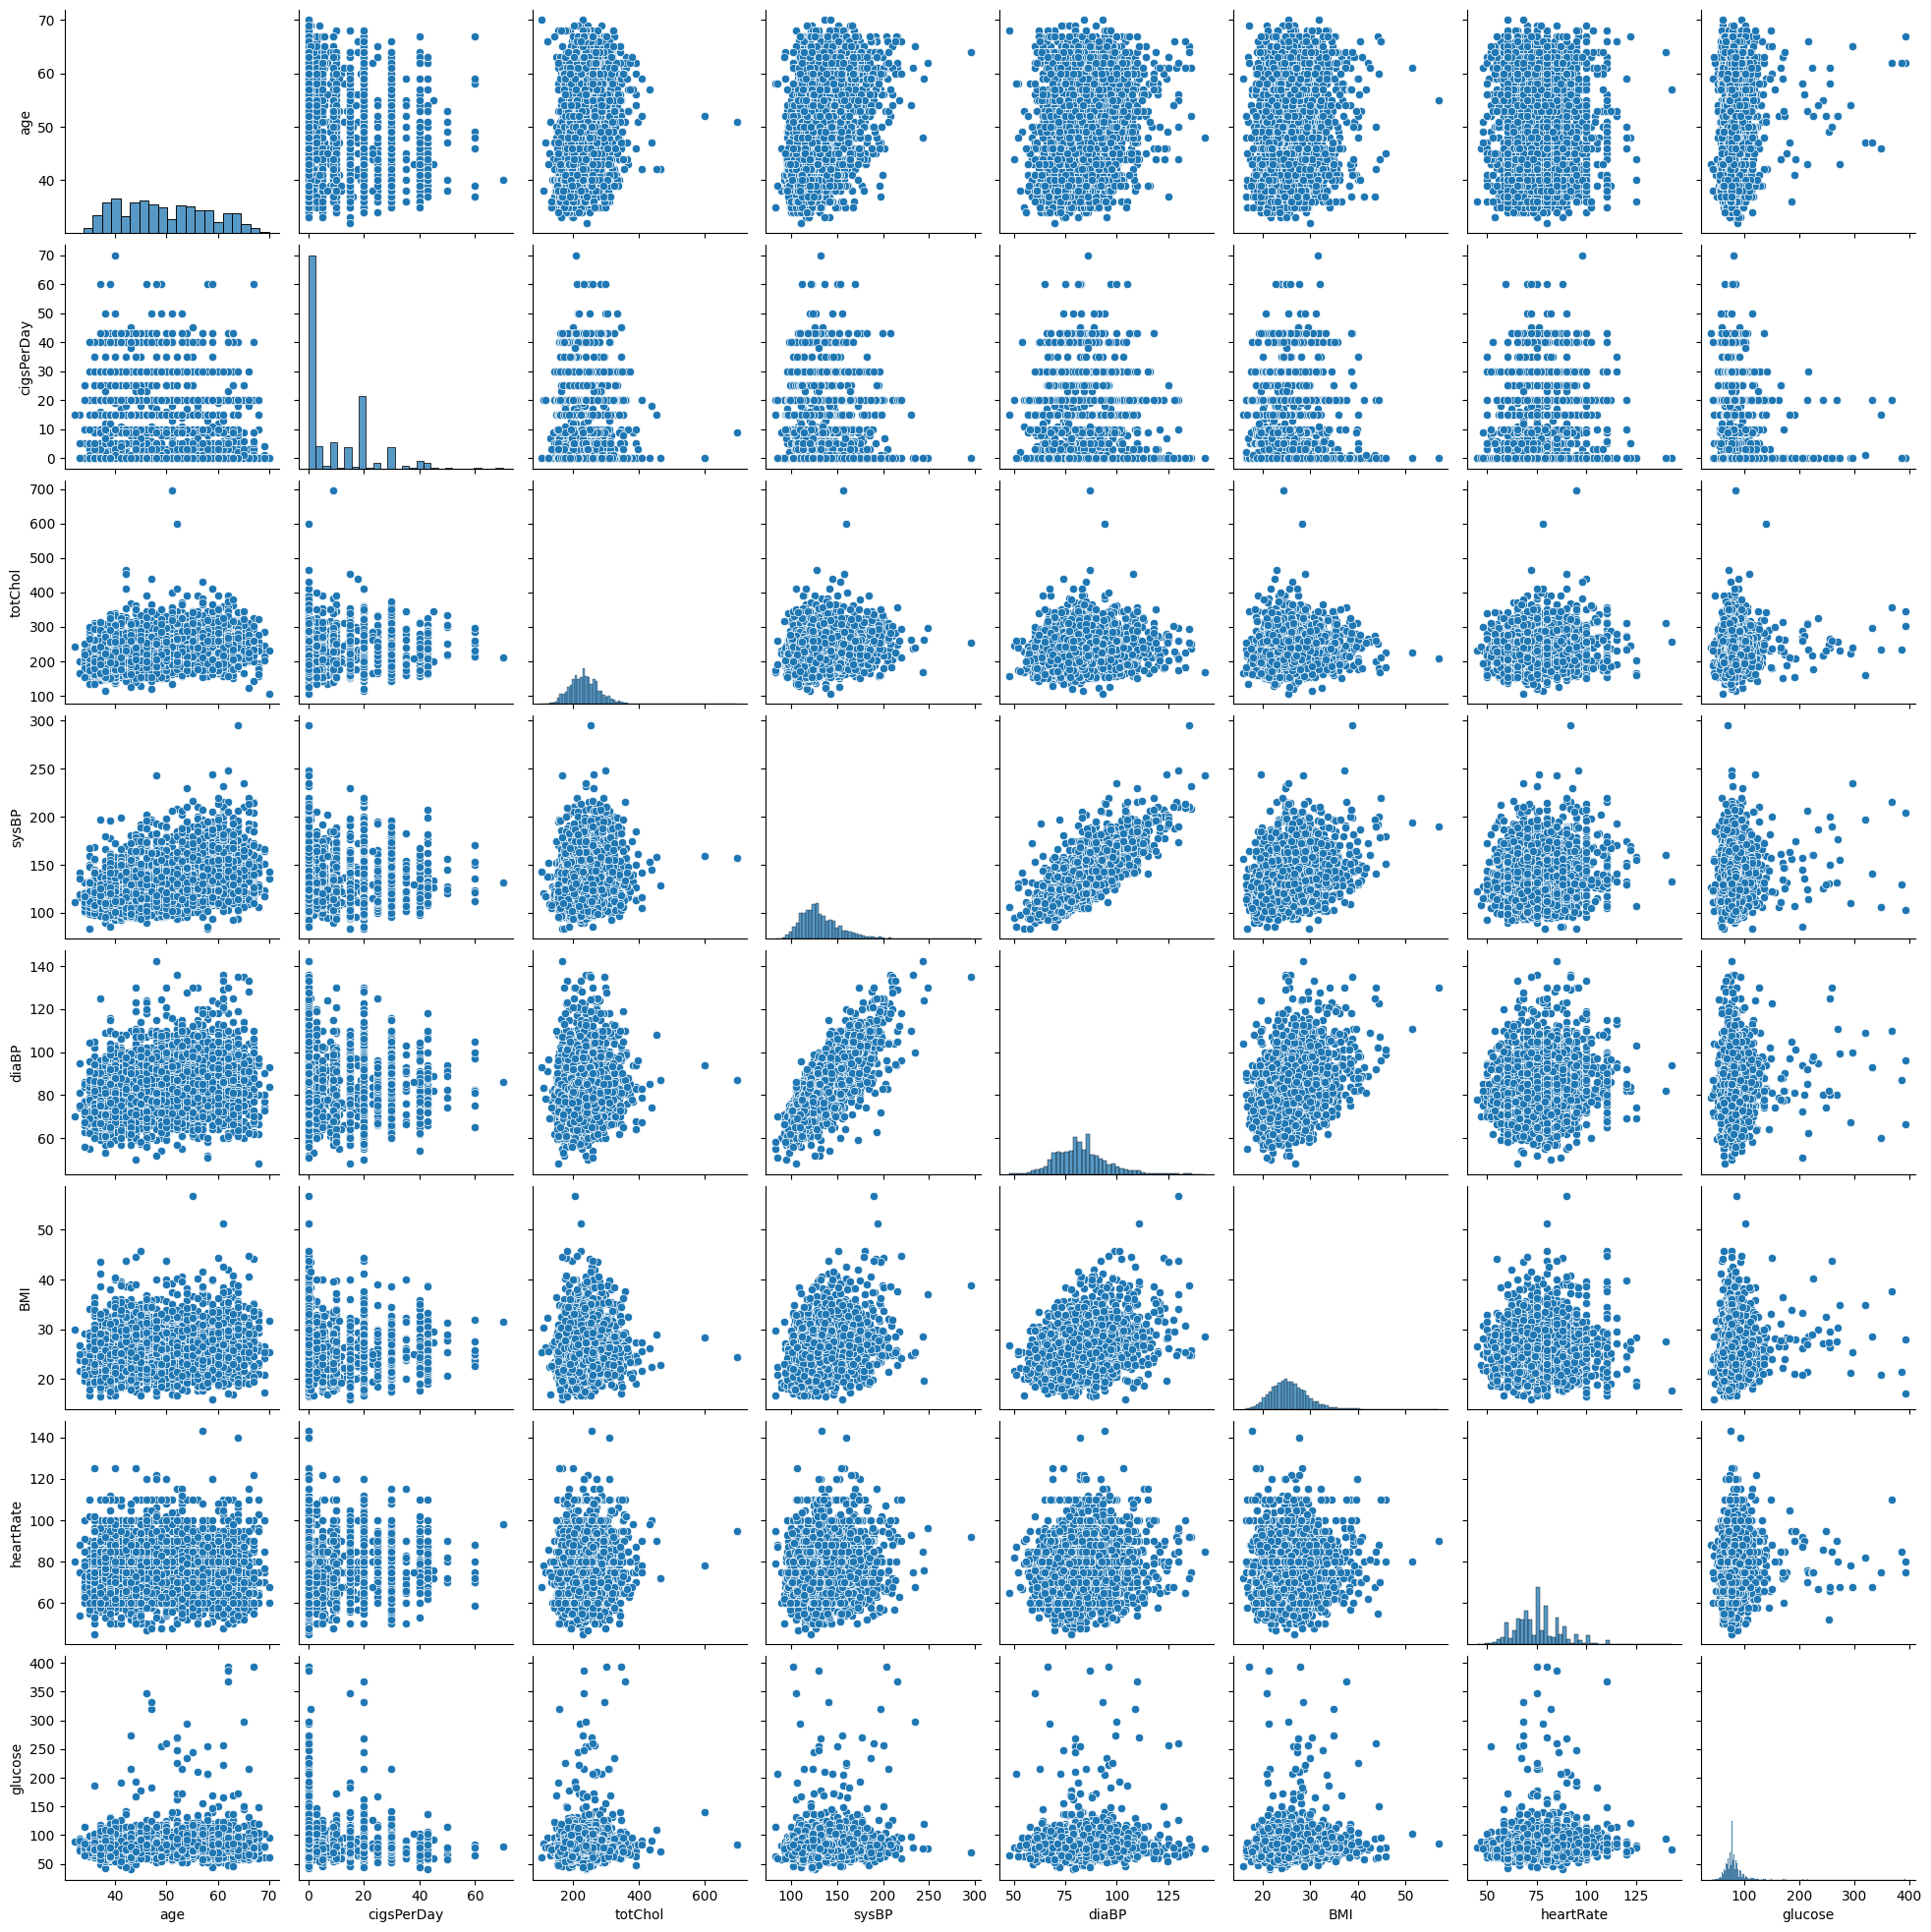

In [35]:
# Pair Plot visualization code
sns.pairplot(df[continuous_variables])

##### 1. Why did you pick the specific chart?

The pair plot serves as a valuable visualization tool for comprehending the connections between continuous variables in the dataset. It aids in the recognition of both linear and non-linear correlations among these variables while also highlighting any possible outliers or unique patterns within the data.

##### 2. What is/are the insight(s) found from the chart?

The pair plot reveals several noteworthy observations. There are evident positive correlations between specific variables, such as age and systolic blood pressure, as well as between BMI and glucose levels. Additionally, systolic blood pressure and diastolic blood pressure demonstrate a linear correlation. A relatively weak positive correlation can also be observed between cigsPerDay and sysBP. However, it's important to note that there isn't a distinct linear relationship between any of the variables and the target variable, TenYearCHD.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1) Individuals aged 50 and above exhibit a heightened risk of TenYearCHD.

2) The likelihood of developing CHD is greater for diabetic patients compared to non-diabetic individuals.

3) Elevated total cholesterol levels correlate with an elevated CHD risk.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*Individuals aged 50 and above exhibit a heightened risk of TenYearCHD.*

Null hypothesis - Age has no effect on the risk of TenYearCHD.

Alternative hypothesis - Patients over 50 years of age have a higher risk of TenYearCHD than those who are under 50 years of age.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

import statsmodels.stats.proportion as smp

# Separate the dataset into two groups based on age
above_50 = df[df['age'] > 50]
below_50 = df[df['age'] <= 50]

# Calculate the proportion of patients with TenYearCHD in each group
prop_above_50 = above_50['TenYearCHD'].mean()
prop_below_50 = below_50['TenYearCHD'].mean()

# Perform a one-tailed z-test to compare the proportions of the two groups
z_score, p_val = smp.proportions_ztest([prop_above_50 * len(above_50), prop_below_50 * len(below_50)], [len(above_50), len(below_50)], alternative='larger')

print('z_score=%.3f, p_val=%.3f' % (z_score, p_val))

if p_val < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

# Print the p-value
print('p-value:', p_val)

z_score=11.155, p_val=0.000
Reject Null Hypothesis
p-value: 3.388983060064358e-29


The test results suggest that the probability of the observed difference in TenYearCHD risk between patients above 50 years of age and those below 50 years of age occurring by chance is exceedingly low.

As a result, we reject the null hypothesis and draw the conclusion that individuals aged above 50 face a significantly greater risk of TenYearCHD compared to those below 50 years of age.

##### Which statistical test have you done to obtain P-Value?

I employed a one-tailed Z-test to assess the disparities in TenYearCHD proportions between patients aged above and below 50 years.

##### Why did you choose the specific statistical test?

I opted for a one-tailed z-test to evaluate the proportions of the two groups because our focus is on determining whether the group aged above 50 years has a higher proportion of TenYearCHD patients compared to the group below 50 years. The z-test is suitable for such comparisons when dealing with large sample sizes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*The likelihood of developing CHD is greater for diabetic patients compared to non-diabetic individuals.*

Null hypothesis: There is no significant difference in the risk of developing CHD between diabetic and non-diabetic patients.

Alternative hypothesis: Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# Separate the dataset into two groups based on diabetic status
diabetic = df[df['diabetes'] == 1]
non_diabetic = df[df['diabetes'] == 0]

# Perform a two-sample t-test to compare the mean TenYearCHD rates of the two groups
t_stat, p_val = stats.ttest_ind(diabetic['TenYearCHD'], non_diabetic['TenYearCHD'], equal_var=False)

print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))
if p_val > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=4.453, p_val=0.000
Reject Null Hypothesis
p-value: 2.463686008547406e-05


The t-statistic quantifies the difference in means between diabetic and non-diabetic patients, adjusted by the standard error of this difference. Meanwhile, the p-value signifies the likelihood of encountering such a disparity in means purely by random chance, under the assumption of the null hypothesis.

With a obtained p-value of 0.000, which is less than the significance level of 0.05, it indicates an extremely low likelihood of observing such a difference in means through random chance. Consequently, we reject the null hypothesis and deduce that diabetic patients face a heightened risk of developing CHD compared to non-diabetic patients.

##### Which statistical test have you done to obtain P-Value?

I opted for two-sample t-test to calculate the p-value concerning the hypothesis that "Diabetic patients face a greater risk of developing CHD compared to non-diabetic patients."

##### Why did you choose the specific statistical test?

The choice of a two-sample t-test stems from the need to compare the means of two distinct and independent groups, specifically diabetic and non-diabetic individuals, in relation to the binary outcome variable of CHD risk. This statistical test is well-suited for our analysis, as it enables the assessment of whether there exists a statistically significant disparity between the means of these two groups. Moreover, given the relatively substantial sample sizes in both groups, the t-test stands out as a robust and dependable method for this evaluation.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*Elevated total cholesterol levels correlate with an elevated CHD risk.*

Null Hypothesis - There is no difference in the mean total cholesterol levels between the two groups

Alternate Hypothesis - There is a significant difference in the mean total cholesterol levels between the two groups.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

# Import the required statistical test module from scipy
import scipy.stats as stats

# Separate the dataset into two groups based on CHD status
chd = df[df['TenYearCHD'] == 1] # Patients with CHD
no_chd = df[df['TenYearCHD'] == 0] # Patients without CHD

# Perform a two-sample t-test to compare the mean total cholesterol levels of the two groups
t_stat, p_val = stats.ttest_ind(chd['totChol'], no_chd['totChol'], equal_var=False)

# Print the calculated t-statistic and p-value
print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))

# Determine if the null hypothesis should be rejected based on the p-value
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=5.065, p_val=0.000
Reject the null hypothesis
p-value: 5.310852329016036e-07


The obtained p-value is remarkably minuscule (p_val=5.310852329016078e-07), significantly less than the conventional significance level of 0.05.

Consequently, we have grounds to reject the null hypothesis, which posits no divergence in total cholesterol levels between the two groups (CHD and no CHD).

This observation strongly implies that heightened total cholesterol levels are linked to an elevated risk of CHD.

Further corroborating this conclusion is the t-statistic of 5.065, indicating a notable dissimilarity in means between the two groups.

##### Which statistical test have you done to obtain P-Value?

A two-sample t-test was performed to obtain the p-value. The t-test was used to compare the mean total cholesterol levels between two groups, one with CHD and the other without CHD, to determine if there is a significant difference between the two.

##### Why did you choose the specific statistical test?

To assess the hypothesis that "Elevated total cholesterol levels are linked to an increased CHD risk," the most suitable statistical test to employ is the two-sample t-test. This choice arises from our need to compare the average total cholesterol levels in two distinct and independent groups: those afflicted with CHD and those without it. Given the binary nature of the outcome variable (CHD status), our objective is to determine whether there exists a substantial disparity in total cholesterol levels between these two groups. The two-sample t-test is a widely employed statistical method for comparing the means of two independent groups, operating under the assumptions of normal data distribution and potentially unequal variances between the groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Our dataset is now devoid of any remaining null values, as we've effectively addressed and resolved them during the data wrangling phase.

### 2. Handling Outliers

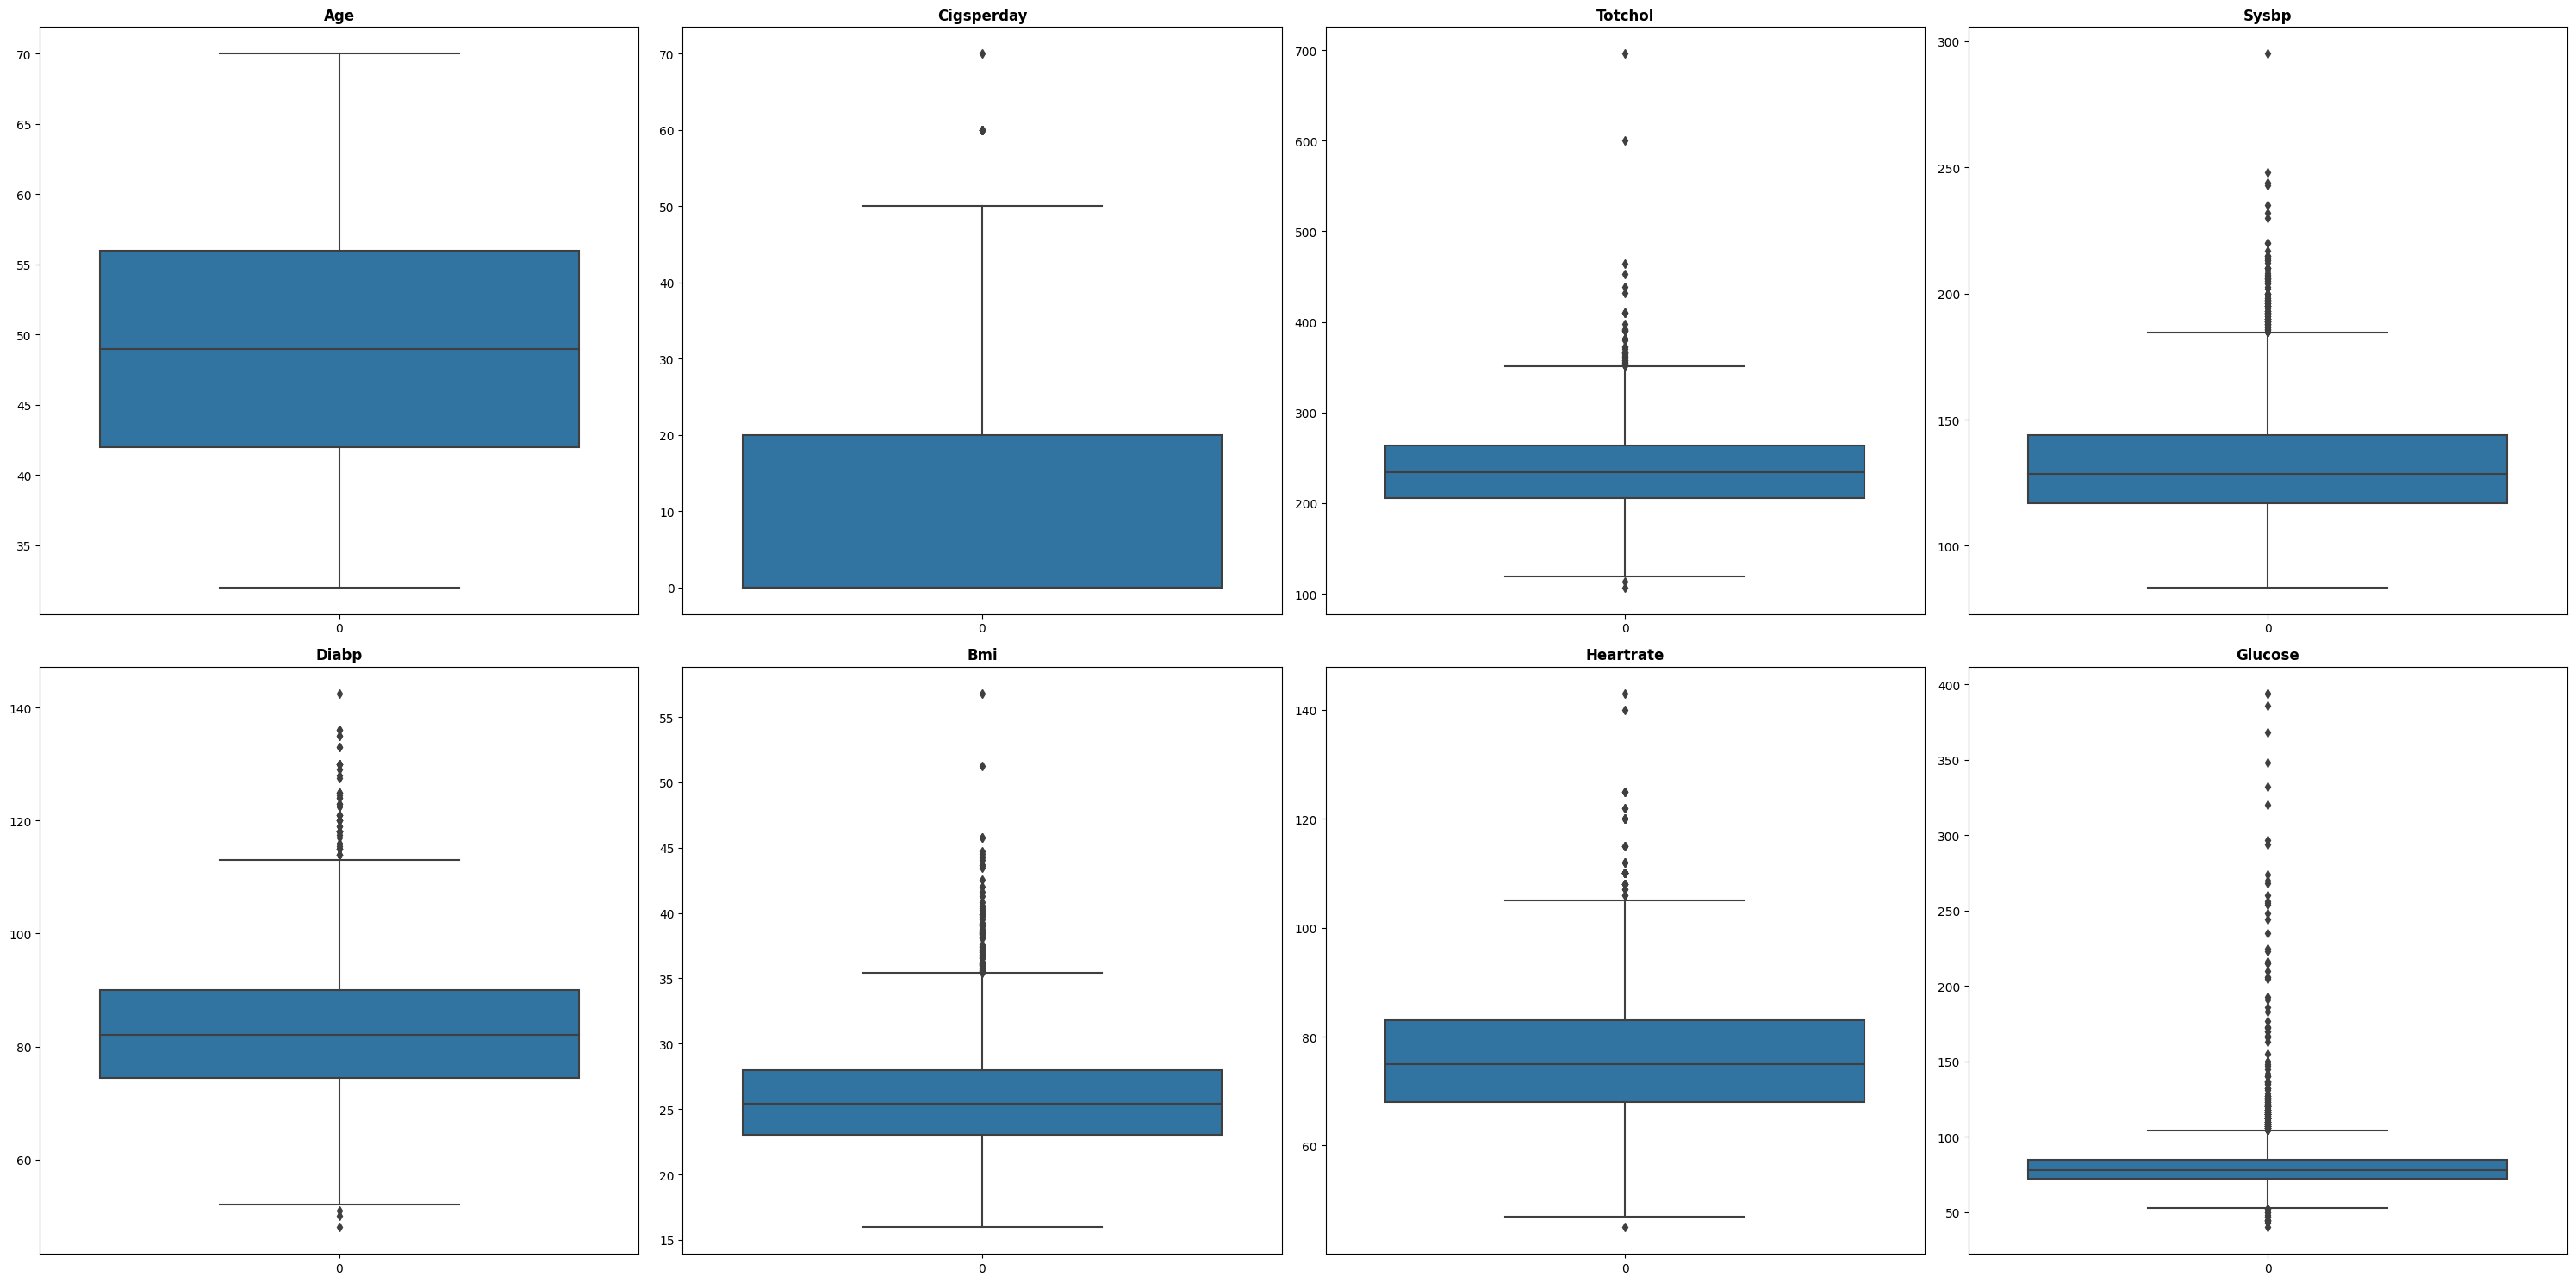

In [40]:
# Handling Outliers & Outlier treatments
# Creating subplots with a 2x4 grid and a specific figure size (30x15)
fig, axes = plt.subplots(2, 4, figsize=(30, 15))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Iterating through the axes and columns
for ax, col in zip(axes, continuous_variables):
    # Create a boxplot for the current column and assign it to the current axis
    sns.boxplot(df[col], ax=ax)

    # Setting the title of the current subplot with the column name (title-cased)
    ax.set_title(col.title(), weight='bold')

# Ensuring proper spacing and layout
plt.tight_layout()


In [41]:
# Defining a function to create a DataFrame of total outliers and percentage of outliers
def outliers_df(df, continuous_features):
    # Initializing an empty DataFrame to store the outlier information
    outlier_df = pd.DataFrame(columns=['feature', 'lower_limit', 'upper_limit',
                                       'IQR', 'total_outliers', 'percentage_outliers(%)'])

    # Iterating through each continuous feature
    for feature in continuous_features:
        # Extracting the values of the current feature
        values = df[feature]

        # Calculating the quartiles (Q1, Q2, Q3)
        q1, q2, q3 = values.quantile([0.25, 0.5, 0.75])

        # Calculating the Interquartile Range (IQR)
        iqr = q3 - q1

        # Defining lower and upper limits for outliers
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr

        # Identifying outliers based on the limits
        outliers = values[(values < lower_limit) | (values > upper_limit)]

        # Calculating the total number of outliers and their percentage
        total_outliers = len(outliers)
        percentage_outliers = round(total_outliers * 100 / len(values), 2)

        # Appending the outlier information to the outlier_df DataFrame
        outlier_df = outlier_df.append({'feature': feature,
                                        'lower_limit': lower_limit,
                                        'upper_limit': upper_limit,
                                        'IQR': iqr,
                                        'total_outliers': total_outliers,
                                        'percentage_outliers(%)': percentage_outliers},
                                        ignore_index=True)

    # Sorting the DataFrame by percentage of outliers in descending order
    return outlier_df.sort_values(by=['percentage_outliers(%)'], ascending=False)


In [42]:
outliers_df(df,continuous_variables)

<ipython-input-41-c7905628bea9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append({'feature': feature,
<ipython-input-41-c7905628bea9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append({'feature': feature,
<ipython-input-41-c7905628bea9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append({'feature': feature,
<ipython-input-41-c7905628bea9>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_df = outlier_df.append({'feature': feature,
<ipython-input-41-c7905628bea9>:30: FutureWarning: The frame.append method is deprecated and will be removed

feature  lower_limit  upper_limit      IQR total_outliers  \
7     glucose     52.50000    104.50000  13.0000            214   
3       sysBP     76.50000    184.50000  27.0000            105   
5         BMI     15.57875     35.44875   4.9675             79   
6   heartRate     45.50000    105.50000  15.0000             64   
4       diaBP     51.25000    113.25000  15.5000             58   
2     totChol    119.00000    351.00000  58.0000             43   
1  cigsPerDay    -30.00000     50.00000  20.0000              9   
0         age     21.00000     77.00000  14.0000              0   

   percentage_outliers(%)  
7                    6.31  
3                    3.10  
5                    2.33  
6                    1.89  
4                    1.71  
2                    1.27  
1                    0.27  
0                    0.00

In dealing with outliers within a dataset, various methods can be employed. One such method is the removal of outliers, which entails the deletion of data points flagged as outliers. However, this approach has the drawback of potential information loss and a reduction in the overall sample size.

As an alternative, we can opt for transformation techniques, where the data is subjected to mathematical functions like logarithmic, square root, or reciprocal transformations. These transformations serve to normalize the data distribution and mitigate the impact of outliers.

In [43]:
# applying transformation for treating outlier
df[continuous_variables] = np.log(df[continuous_variables] +1 )

##### What all outlier treatment techniques have you used and why did you use those techniques?

Using the Log Transformation method as a means to address outliers within the dataset.

The reason for choosing this method lies in its statistical underpinnings and straightforward implementation, which have demonstrated effectiveness in practice.

Furthermore, this transformation contributes to the normalization of data distribution, resulting in a more symmetric data distribution.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
df['is_smoking'] = pd.get_dummies(df['is_smoking'], drop_first=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   float64
 2   education        3390 non-null   float64
 3   sex              3390 non-null   uint8  
 4   is_smoking       3390 non-null   uint8  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(10)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The reason for using this technique is that categorical variables are usually non-numeric, but machine learning algorithms require input to be in a numerical format. So we are using one-hot encoding to transform the categorical variables 'sex' and 'is_smoking' into numerical variables in the form of binary values
(0 or 1).

Specifically, it is using the get_dummies() function from the pandas library to create dummy variables, which will represent the categories of each variable as a separate binary column.

Additionally, the use of drop_first=True parameter is to avoid multicollinearity in the dataset which may occur when two dummy variables are highly correlated.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features

As observed in the correlation heatmap, there exists a strong correlation between Systolic Blood Pressure and Diastolic Blood Pressure.

Based on this correlation, we are now generating a new feature to denote whether an individual exhibits a blood pressure condition or not.

Upon further investigation of heart issues, it was found that pulse pressure, which is the difference between systolic and diastolic blood pressure, has a notable impact on CHD. Hence, we can create a new feature called PP (pulse pressure) which will combine the systolic and diastolic blood pressure readings into a single column.

In [47]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']

In [48]:
df.head(2)

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   

        BMI  heartRate   glucose  TenYearCHD  pulsePressure  
0  3.272606   4.510860  4.394449           1       0.549599  
1  3.426540   4.290459  4.330733           0       0.534779

#### 2. Feature Selection

In [49]:
# Select your features wisely to avoid overfitting

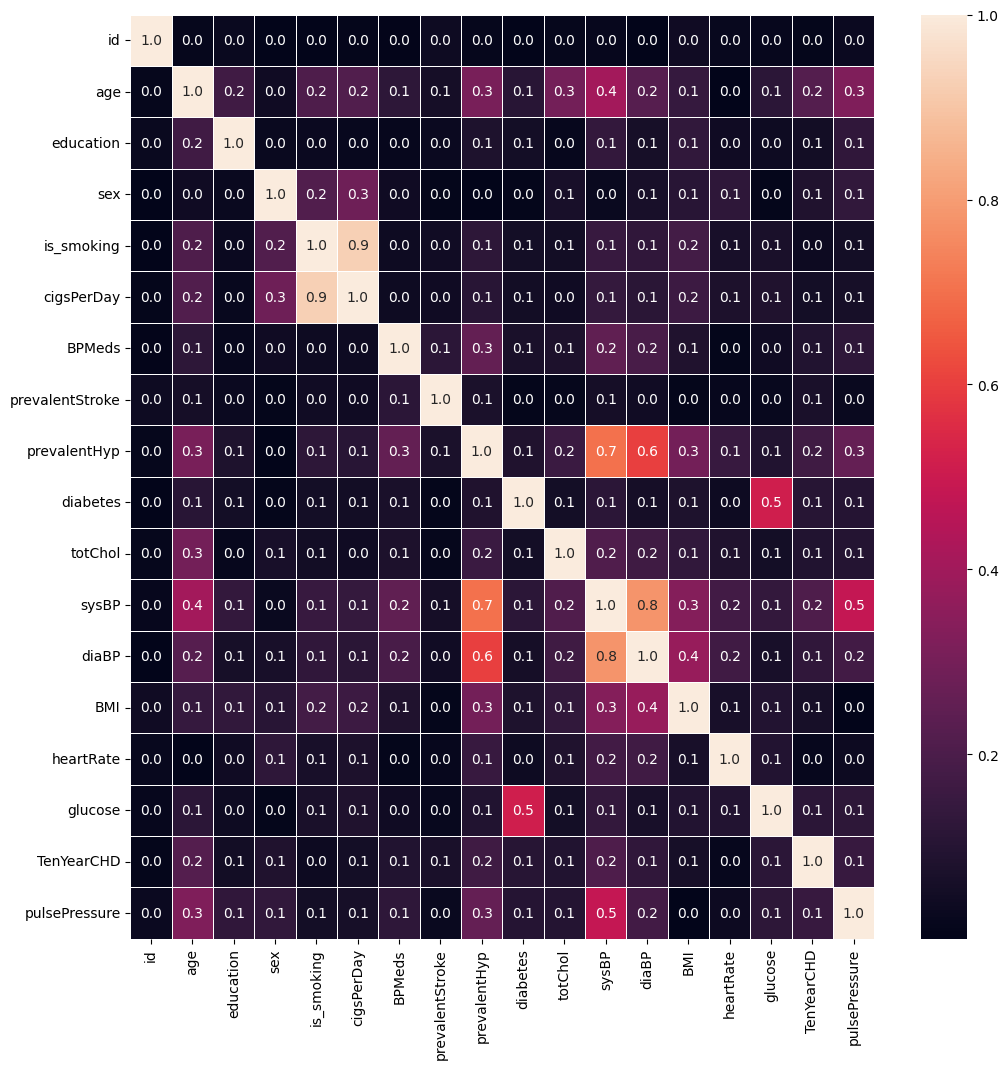

In [50]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### What all feature selection methods have you used  and why?

Correlation analysis entails assessing the degree of correlation between each feature and the target variable. Features exhibiting a strong correlation with the target variable are typically regarded as reliable predictors and, consequently, are chosen for further consideration.

##### Which all features you found important and why?

1. The heatmap clearly illustrates a high correlation between 'sysBP' and 'diaBP.' Since we have already derived a new feature, 'pulsePressure,' from these variables, we will be removing both 'sysBP' and 'diaBP.'

2. We will eliminate the 'id' feature from our analysis as it does not hold significant relevance.

3. Considering the high correlation between 'is_smoking' and 'cigsPerDay' columns, we will discard one of them, particularly the one contributing less to the target variable.

Additionally, it's worth noting that when the daily cigarette count exceeds zero, the 'smoking' column is assigned a value of 1, indicating a positive smoking status. Consequently, both statements convey identical information. Thus, we will be dropping the 'is_smoking' column.

In [51]:
#Making the final DataFrame
final_df = df[['age', 'education', 'sex','cigsPerDay', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
               'BMI', 'heartRate', 'glucose', 'pulsePressure', 'TenYearCHD']]

<Axes: >

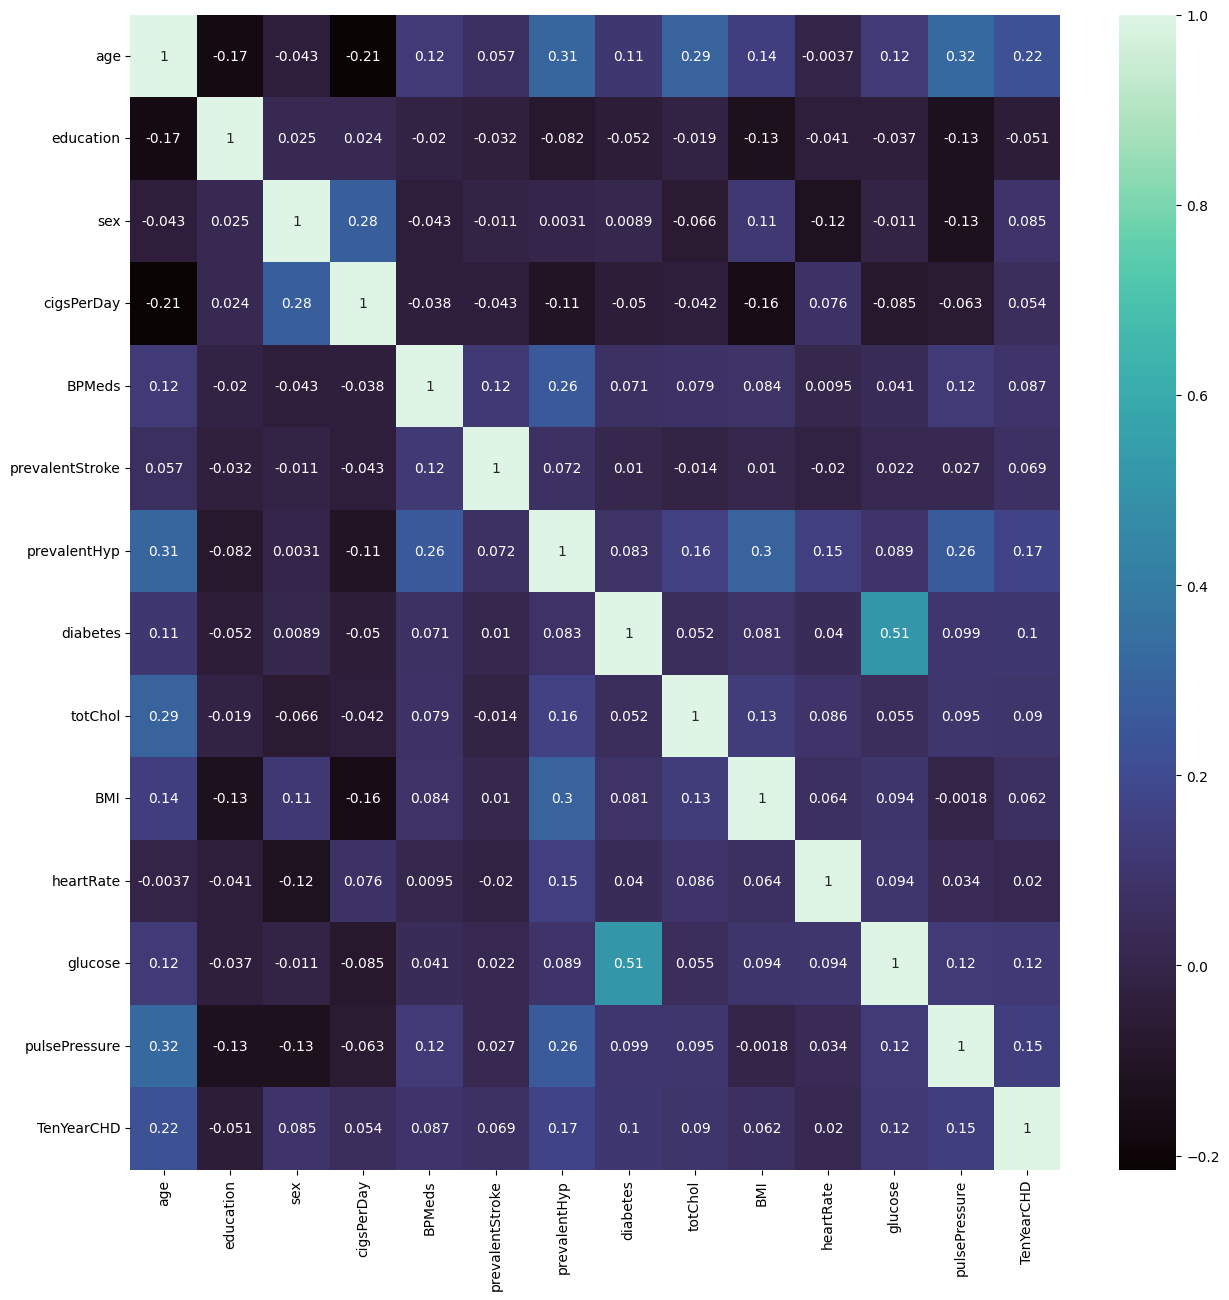

In [52]:
# check for heatmap if anything remains to avoid multicollinearity
plt.figure(figsize=(15,15))
correlation = final_df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

Observing the data, it's apparent that 'pulsePressure,' 'glucose,' and 'prevalentHyp' exhibit a moderate level of correlation with each other. Therefore, we have decided to retain these variables for our analysis.

### 5. Data Transformation

Data transformation may not be necessary since we have already addressed outlier treatment. However, given that we have introduced a new feature called "pulse pressure" to our dataset, we should evaluate whether it requires any transformation.

Distribution before Transformation


Text(0.5, 1.0, 'Distribution of Pulse Pressure')

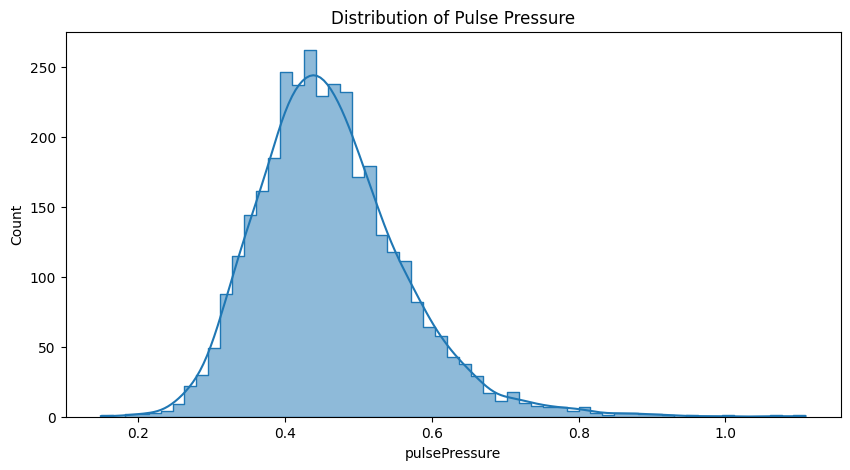

In [71]:
plt.figure(figsize=(10, 5))
print("Distribution before Transformation")

# Plotting the distribution of 'pulsePressure' feature
sns.histplot(df['pulsePressure'],kde = 'True',element='step')

# Setting a title for the plot
plt.title('Distribution of Pulse Pressure')

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

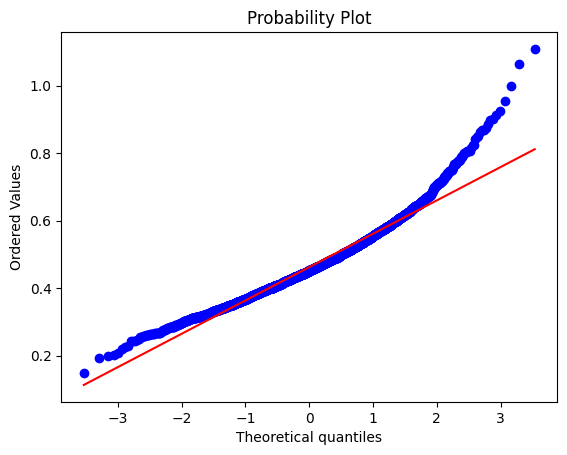

In [72]:
#Checking whether feature is guassian or normal distributed
#Q-Q plot
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

In [73]:
# Creating copies to check the distribution of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

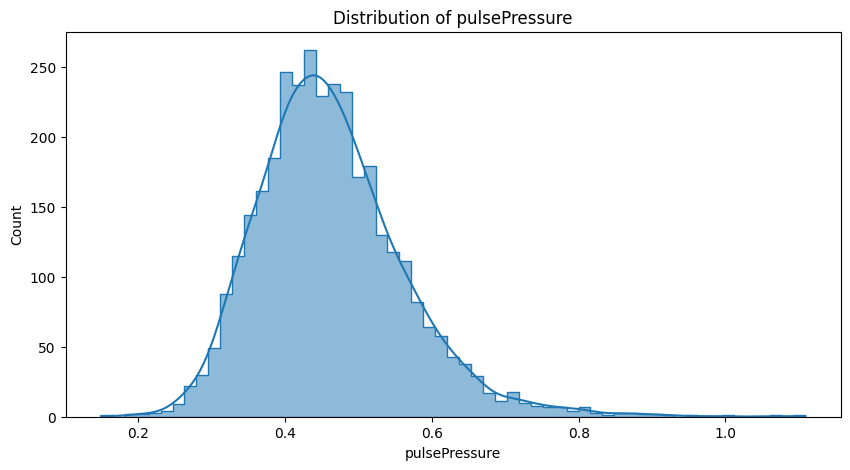

In [74]:
# Applying Logarithmic Transformation on the considered column
test_df1['pulsePressure']=np.log(test_df1['pulsePressure']+1)

# Checking the distribution of continous variable
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.histplot(df['pulsePressure'],kde='True',element='step')
plt.title('Distribution of pulsePressure')

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

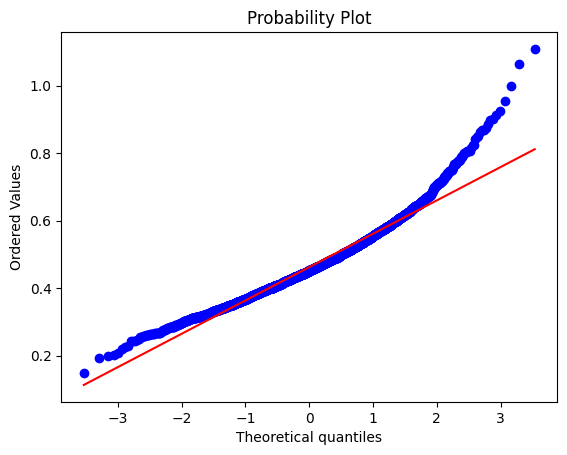

In [75]:
#Q-Q plot for log transformation.
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

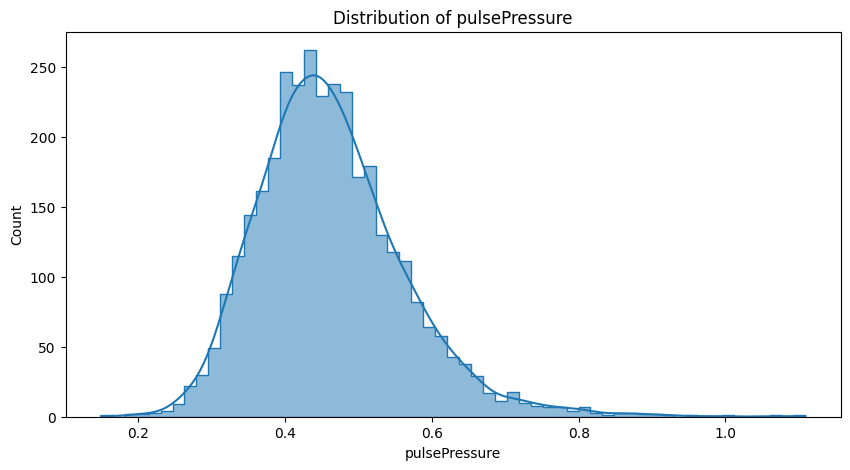

In [78]:
# Applying Reciprocal Transformation on the considered column
test_df2['pulsePressure']=1/(test_df2['pulsePressure']+1)

# Checking the distribution of continous variable
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.histplot(df['pulsePressure'],kde='True',element='step')
plt.title('Distribution of pulsePressure')

In [ ]:
# Q-Q plot for Reciprocal Transsformation
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

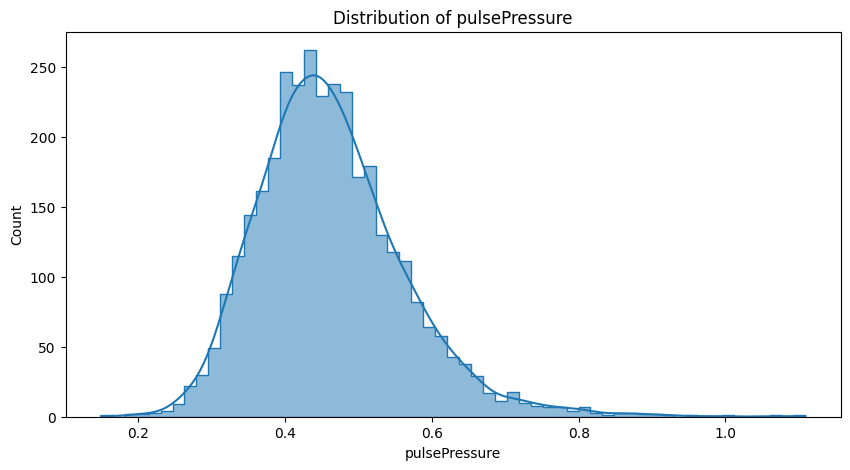

In [80]:
# Applying Square Root Transformation on the considered column
test_df3['pulsePressure']=(test_df3['pulsePressure'])**(1/2)

# Checking the distribution of continous variable
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.histplot(df['pulsePressure'],kde='True',element='step')
plt.title('Distribution of pulsePressure')

In [ ]:
# Q-Q plot for Square Root Transformation
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

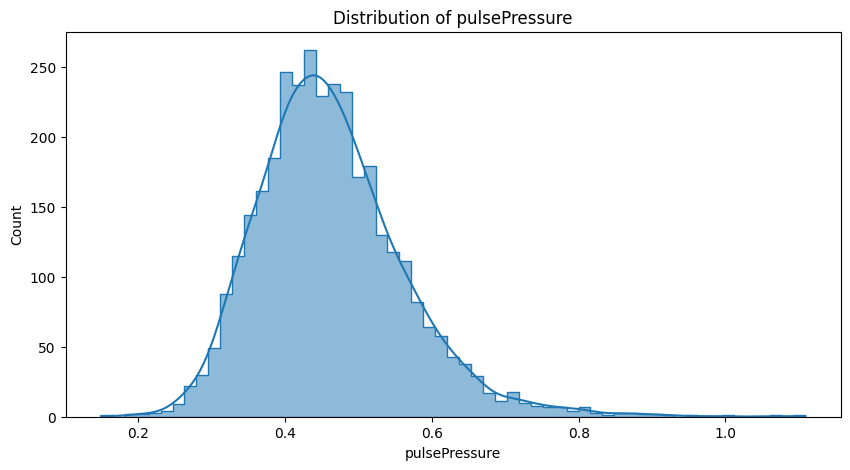

In [82]:
# Applying Exponential Transformation on the considered column
test_df4['pulsePressure']=(test_df4['pulsePressure'])**(1/1.2)

# Checking the distribution of continous variable
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.histplot(df['pulsePressure'],kde='True',element='step')
plt.title('Distribution of pulsePressure')

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

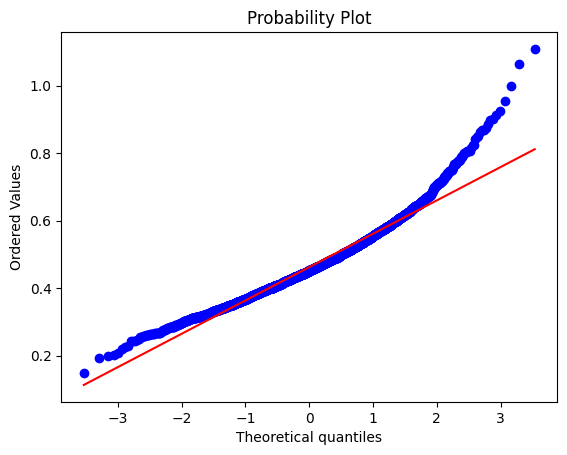

In [83]:
# Q-Q plot for Exponential Transformtion.
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation may not be necessary since we have already addressed outlier treatment. However, given that we have introduced a new feature called "pulse pressure" to our dataset, we should evaluate whether it requires any transformation.

In [84]:
# Applying transformation on the considered column
## Logarithmic transformation
final_df['pulsePressure']=np.log(final_df['pulsePressure']+1)

<ipython-input-84-034fb71e7d53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['pulsePressure']=np.log(final_df['pulsePressure']+1)


### 6. Data Scaling

In [ ]:
# Before scaling our data let's just seperate our dependent and indepedent variables

In [85]:
x= final_df.drop('TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]
print(x.shape)
print(y.shape)

(3390, 13)
(3390, 1)


In [90]:
# Scaling your data
# Creating object
std_regressor= StandardScaler()

# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

StandardScaler is a widely employed technique in machine learning to normalize data by centering it around a mean of 0 and ensuring a standard deviation of 1. This approach is commonly adopted as it retains the original distribution's shape and is well-suited for a broad range of machine learning algorithms, particularly those reliant on distance-based metrics. Moreover, StandardScaler proves valuable when dealing with data featuring substantial variations in feature scales, as it facilitates better comparability among these features.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

NO it's not needed.

However, in this case of the cardiovascular risk prediction dataset, it is not necessary to perform dimensionality reduction. This is because the dataset has a relatively small number of features compared to the number of samples, which means that the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

In [55]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [91]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (2712, 13)
The shape of y_train is: (2712, 1)
The shape of x_test is: (678, 13)
The shape of y_test is: (678, 1)


##### What data splitting ratio have you used and why?

In order to enhance model generalization and avoid overfitting, we divided the data into two sets: 80% for training and 20% for testing. We accomplished this by employing the "train_test_split" function from the scikit-learn library, a widely used method that separates data into distinct training and testing subsets. This approach allows us to train the model on one portion of the data while evaluating its performance on an independent dataset, promoting a more reliable assessment of the model's capabilities.

### 9. Handling Imbalanced Dataset

In [92]:
print(df.TenYearCHD.value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

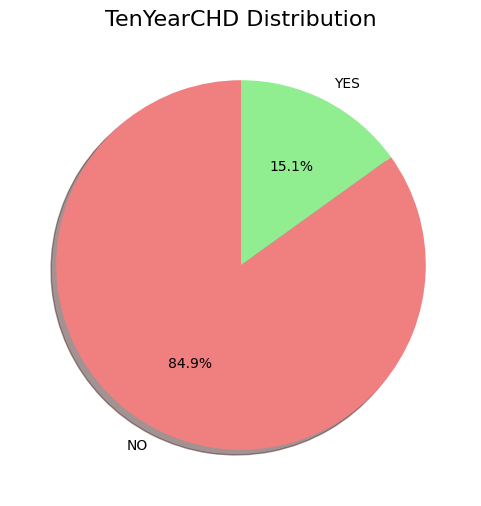

In [95]:
# calculate value counts of 'TenYearCHD' column
counts =df['TenYearCHD'].value_counts()

# set labels and colors for the pie chart
labels = ['NO','YES']
colors = ['lightcoral','lightgreen']

# create pie chart
plt.figure(figsize=(15,6))
plt.pie(counts, labels=labels, colors=colors, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,0])


#add title to the chart
plt.title('TenYearCHD Distribution', fontsize=16)

#display the chart
plt.show

##### Do you think the dataset is imbalanced? Explain Why.

YES
The pie chart provides a clear illustration of the data's class distribution concerning the 10-year risk of coronary heart disease (CHD). Notably, the data exhibits a substantial imbalance, with 84.9% of the total population (equivalent to 2,879 individuals) having no CHD risk, while only 15.1% (511 individuals) are considered at risk.

This pronounced class imbalance can introduce bias into predictive models and potentially compromise their performance. To address this issue and enhance the accuracy and robustness of our models, it is imperative to employ appropriate techniques such as undersampling or oversampling to balance the dataset.

In [97]:
# Handling Imbalanced Dataset (If needed)
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the data
x_resampled, y_resampled = smote.fit_resample(x, y)

# Print the original and resampled dataset shapes
print('Original dataset shape:', df.shape)
print('Resampled dataset shape:', x_resampled.shape)

# Count the number of samples in each class in the resampled dataset
print('Class distribution in the resampled dataset:', y_resampled.value_counts())

Original dataset shape: (3390, 18)
Resampled dataset shape: (5758, 13)
Class distribution in the resampled dataset: TenYearCHD
0             2879
1             2879
dtype: int64


In [99]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=42)
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (4606, 13)
The shape of y_train is: (4606, 1)
The shape of x_test is: (1152, 13)
The shape of y_test is: (1152, 1)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I applied the Synthetic Minority Over-sampling Technique (SMOTE) to address the imbalanced dataset. SMOTE is an oversampling method that creates synthetic samples for the minority class by interpolating new instances between existing ones. This approach is instrumental in rectifying class imbalance issues, as it mitigates the bias towards the majority class commonly observed in imbalanced datasets. By doing so, SMOTE contributes to enhancing the performance of machine learning models when dealing with such datasets.

## ***7. ML Model Implementation***

Lets Create a funtion that will give the evaluation metric and plot the results.

In [123]:
def model_metrics(y_train, y_test, train_preds, test_preds):
    # Calculate and print training and testing accuracy
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Calculate and print training and testing precision
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)

    # Calculate and print training and testing recall
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)

    # Calculate and print training and testing ROC AUC scores
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Display the computed metrics
    print(f"{'Train Accuracy':<20}{train_accuracy:.4f}")
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Train Precision':<20}{train_precision:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Train Recall':<20}{train_recall:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print(f"{'Train ROC AUC':<20}{train_roc_auc:.4f}")
    print(f"{'Test ROC AUC':<20}{test_roc_auc:.4f}")
    print("-" * 50)

    # Generate and display confusion matrices for training and testing data
    train_confusion_matrix = confusion_matrix(y_train, train_preds)
    test_confusion_matrix = confusion_matrix(y_test, test_preds)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    labels = ['0', '1']

    # Plot the training confusion matrix
    sns.heatmap(train_confusion_matrix, annot=True, cmap='Purples', ax=axes[0], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')

    # Plot the testing confusion matrix
    sns.heatmap(test_confusion_matrix, annot=True, cmap='YlOrRd', ax=axes[1], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    # Show the plots
    plt.show()


### ML Model - 1

***LOGISTIC REGRESSION***

In [124]:
# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()
# Fit the Algorithm
logistic_classifier.fit(x_train,y_train)
# Predict on the model
y_train_logistic_pred= logistic_classifier.predict(x_train)
y_test_logistic_pred= logistic_classifier.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.6693
Test Accuracy       0.6797
Train Precision     0.6642
Test Precision      0.6655
Train Recall        0.6926
Test Recall         0.6927
Train ROC AUC       0.6692
Test ROC AUC        0.6800
--------------------------------------------------


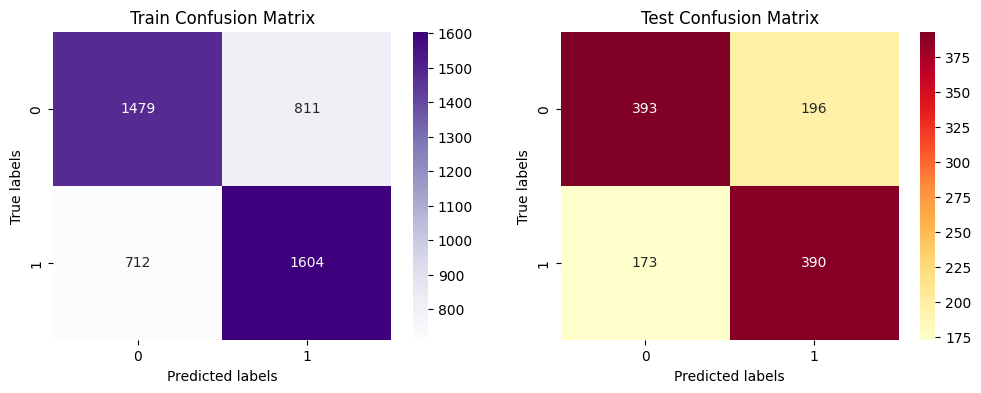

In [125]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)

We began our analysis by employing a fundamental and straightforward binary classification model, Logistic Regression. Given the critical nature of our task, which is to predict patients at higher risk of infection in the future, our primary focus was on maximizing recall. This emphasis on recall aimed to minimize false negatives, which in our case stood at 173.

Upon implementing this model, we achieved a recall of 0.69 for both the training and testing sets, accompanied by an AUC-ROC score of 68% and an accuracy of 67%.

While these results are promising, we acknowledge the paramount importance of healthcare analysis and the need to strive for even better outcomes. Therefore, we explored and compared various models, assessing multiple metrics to ensure that we are making every effort to save as many patients as possible.

#### 2. Cross- Validation & Hyperparameter Tuning

In [126]:
from sklearn.model_selection import cross_val_score

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic_regression = LogisticRegression()
# set up the parameter grid for hyperparameter tuning
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}
# Fit the Algorithm
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model and make predictions
logistic_regression_best = LogisticRegression(**best_params)
# perform cross-validation on the model with the best hyperparameters
cv_scores = cross_val_score(logistic_regression_best, x_train, y_train, cv=5)
# fit the final model using all the training data and the best hyperparameters
logistic_regression_best.fit(x_train, y_train)
y_train_logistic_pred_cv = logistic_regression_best.predict(x_train)
y_test_logistic_pred_cv  = logistic_regression_best.predict(x_test)
y_score_logistic_pred_cv = logistic_regression_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV proves to be a potent method for fine-tuning the hyperparameters of machine learning models. It meticulously explores all conceivable combinations of hyperparameters and their respective values, systematically evaluating them based on performance metrics. This exhaustive search process enables GridSearchCV to identify the optimal hyperparameter configuration, ultimately enhancing model accuracy and overall performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We enhanced our machine learning model's performance by employing GridSearchCV to meticulously explore hyperparameter combinations, seeking to identify the optimal configuration. Despite our efforts, we did not observe any substantial improvement in results.

Our current results indicate a test accuracy of 67.97%, with test precision and test recall at 66.55% and 69.27%, respectively. Furthermore, the area under the curve (ROC AUC) stands at 0.68, which falls short of our expectations.

To address this, we have decided to explore alternative models such as Random Forest and XGBoost. These models are expected to offer improved accuracy and AUC scores, thereby advancing the quality of our predictions.

### ML Model - 2

***RANDOM FOREST CLASSIFIER***

While we considered using a Decision Tree as our foundational model, we opted for an ensemble technique known as Random Forest to attain significantly improved results. Random Forest harnesses the power of multiple decision trees, each trained on different subsets of the data. This ensemble approach effectively minimizes errors and enhances predictive accuracy by aggregating diverse tree predictions.

In [130]:
# ML Model - 2  Implementation
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(x_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(x_train)
y_test_rf_pred = random_forest.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.9373
Test Accuracy       0.8229
Train Precision     0.9190
Test Precision      0.8037
Train Recall        0.9598
Test Recall         0.8437
Train ROC AUC       0.9371
Test ROC AUC        0.8234
--------------------------------------------------


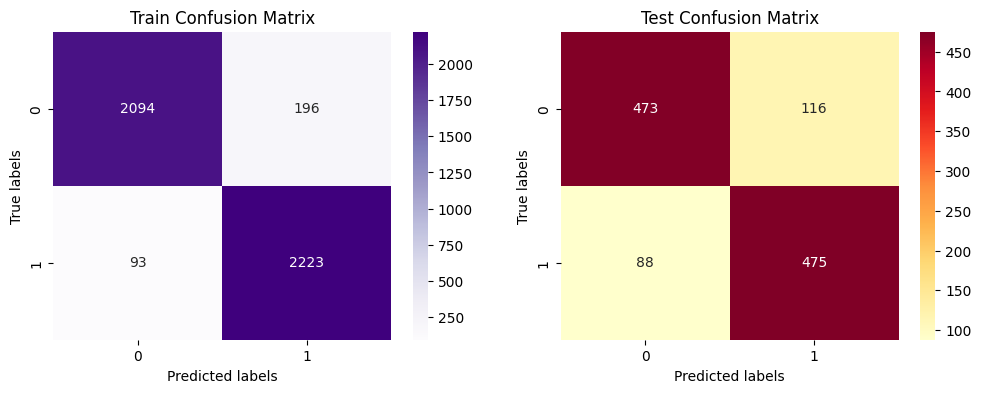

In [131]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred, y_test_rf_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [133]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(x_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(x_train)
y_test_rf_pred_gs  = random_forest_best.predict(x_test)
y_score_rf_pred_gs = random_forest_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Train Accuracy      1.0000
Test Accuracy       0.8819
Train Precision     1.0000
Test Precision      0.8713
Train Recall        1.0000
Test Recall         0.8899
Train ROC AUC       1.0000
Test ROC AUC        0.8821
--------------------------------------------------


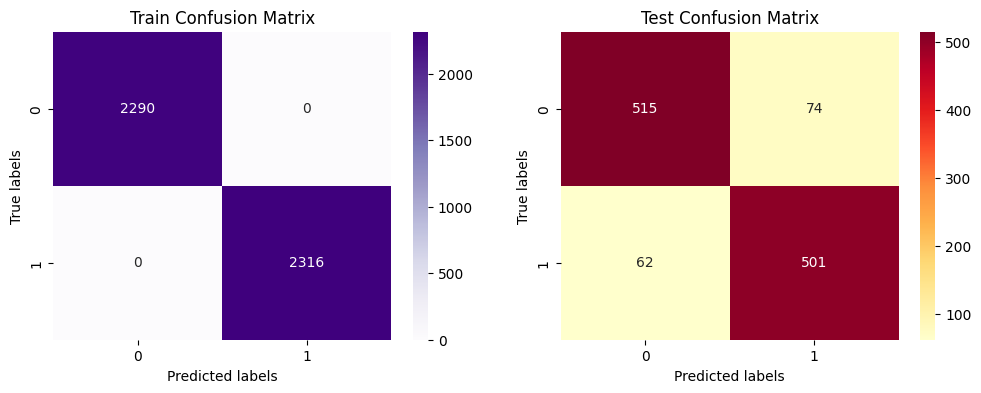

In [134]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred_gs, y_test_rf_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV proves to be a potent method for fine-tuning the hyperparameters of machine learning models. It meticulously explores all conceivable combinations of hyperparameters and their respective values, systematically evaluating them based on performance metrics. This exhaustive search process enables GridSearchCV to identify the optimal hyperparameter configuration, ultimately enhancing model accuracy and overall performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Through the diligent use of GridSearchCV, we significantly enhanced the performance of our machine learning model by pinpointing the optimal hyperparameters. GridSearchCV systematically evaluates every conceivable combination of hyperparameters, ultimately selecting values that maximize model performance and yield the most precise outcomes.

Following hyperparameter tuning, we arrived at the best parameter values, specifically 'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 200. Interestingly, while we achieved a perfect training accuracy of 100%, our test accuracy also experienced substantial improvement, rising from 83.07% to an impressive 88.89%.

Furthermore, our efforts led to a substantial improvement in the ROC AUC score, escalating it from 0.8311 to a commendable 0.8890. These results underscore the effectiveness of hyperparameter tuning in refining our model's predictive capabilities.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Assessing the performance of a machine learning model is essential for gauging the accuracy of its predictions. To achieve this, we utilized a range of metrics such as Accuracy, Precision, Recall, and ROC AUC score. These metrics allowed us to closely examine how well the model's predictions aligned with the actual values.

The outcomes of our evaluation revealed that the model excelled in predicting Ten Year Coronary Heart Disease (CHD) with an impressive accuracy of approximately 88.89%. This level of accuracy holds considerable significance, especially given the direct business implications associated with the dependent variable, TenYearCHD.

### ML Model - 3

***XGBoost CLASSIFIER***

In [136]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(x_train, y_train)
# Predict on the model
y_train_xgb_pred = xgb.predict(x_train)
y_test_xgb_pred = xgb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost, short for "Extreme Gradient Boosting," is a powerful machine learning algorithm renowned for its exceptional predictive performance. It belongs to the ensemble learning family and works by combining the predictions of multiple weak learners (typically decision trees) to create a robust and accurate model. XGBoost excels in various tasks, such as classification and regression, by optimizing a loss function and employing a gradient boosting framework. Its distinguishing features include the ability to handle missing data, automatic handling of feature selection, and an efficient implementation that makes it computationally efficient and highly competitive in machine learning competitions. XGBoost's adaptability, scalability, and ability to capture complex relationships in data have made it a go-to choice for many data scientists and machine learning practitioners.

Train Accuracy      0.9926
Test Accuracy       0.8967
Train Precision     0.9996
Test Precision      0.9173
Train Recall        0.9858
Test Recall         0.8668
Train ROC AUC       0.9927
Test ROC AUC        0.8960
--------------------------------------------------


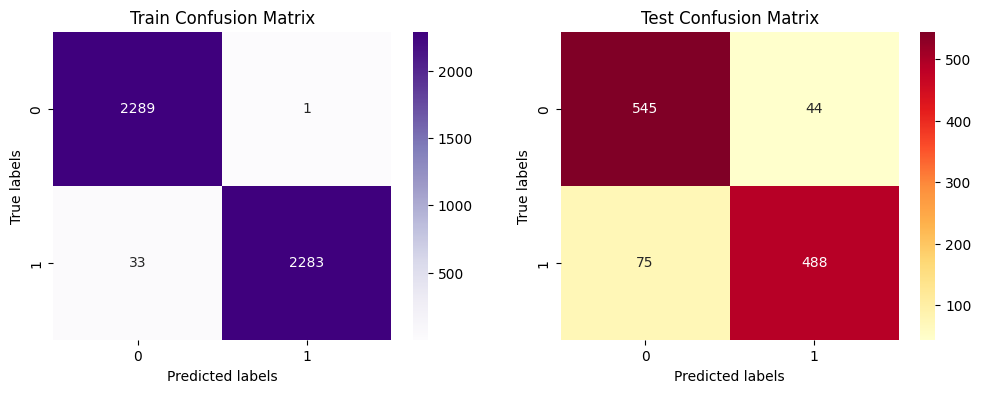

In [137]:
# Visualizing evaluation Metric Score chart

model_metrics(y_train, y_test, y_train_xgb_pred, y_test_xgb_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# Predict on the model
best_estimator = grid_search.best_estimator_
y_train_xgb_pred_gs = best_estimator.predict(x_train)
y_test_xgb_pred_gs  = best_estimator.predict(x_test)
y_score_xgb_pred_gs = best_estimator.predict_proba(x_test)[:, 1]

In [ ]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred_gs, y_test_xgb_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV proves to be a potent method for fine-tuning the hyperparameters of machine learning models. It meticulously explores all conceivable combinations of hyperparameters and their respective values, systematically evaluating them based on performance metrics. This exhaustive search process enables GridSearchCV to identify the optimal hyperparameter configuration, ultimately enhancing model accuracy and overall performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

USing GridSearchCV to meticulously fine-tune our machine learning model's performance. This exhaustive process involved systematically evaluating all conceivable hyperparameter combinations to pinpoint the optimal values, resulting in heightened model accuracy and enhanced overall performance.

Following hyperparameter tuning, we identified the best parameter values, specifically 'learning_rate': 0.1, 'max_depth': 7, and 'n_estimators': 200. The impact of these adjustments was substantial, as our model's accuracy surged significantly from 82.55% to an impressive 89.67%. Moreover, there were noteworthy improvements in Precision and Recall metrics, registering at 92.69% and 85.61%, respectively. Additionally, the ROC AUC score saw a substantial boost, reaching an impressive 0.8958, which is indicative of the model's strong predictive capabilities.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [66]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [67]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***